# **MAP472A - Rapport**
## *Simulation précise du mouvement dans un champ gravitationnel*
Ilian Lamrani Auffray, Hugo Percot, Margot Aubusson de Cavarlay

# Introduction
Notre MODAL porte sur le problème suivant : \\
Soient six planètes de masse $1$, fixés aux positions $(2, −1), (2, 0), (2, 1), (3, −1), (3, 0)$ et $(3, 1)$. Un satelite de masse $1$ est initialement au point $(0, 0)$ et se déplace avec vitesse $1$ dans une direction $θ_0$. \\
L'objectif est de déterminer l'angle $θ_0$ qui permette d'arriver au plus vite au point de coordonnées $(4,1)$, ainsi que de déterminer le temps de trajet.

Ce sujet nous a intéressés par son aspect visuel, mais également technique, demandant de maîtriser les erreurs d'approximation effectuées par les méthodes utilisées. Il offrait également de nombreuses voies d'amélioration pour raffiner le résultat, ainsi que des perpectives de prolongement du problème (3D, planètes en mouvement...).

Au cours de ce trimestre, nous avons pu résoudre numériquement les équations de gravitation de Newton pour différentes conditions initiales et mesurer la précision de nos simulation. Nous avons également travaillé sur un algorithme de balayage pour l'angle initial $θ_0$ afin de déterminer lequel était optimal. Enfin, nous avons pu tester différents ordres de résolution et jouer avec les limites de nos capacités de calcul pour affiner au plus le résultat obtenu.

Ainsi, dans ce rapport, nous présenterons d'abord comment nous avons implémenté et expérimenté les méthodes Runge-Kutta. Puis, nous montrerons les résultats de simulations de diverses trajectoires dans notre espace. Enfin, nous expliquerons l'algorithme retenu pour determiner l'angle inital $θ_0$ optimal.

# I. Méthodes de Runge-Kutta

Afin de simuler les trajectoires de la particule, nous utilisons des méthodes Runge-Kutta. L'avantage de ces méthodes est qu'elles peuvent être déclinées en différents ordres de résolution. Afin de pouvoir changer ces ordres facilement, nous utilisons des tableaux de Butcher. \\
Nous allons implementer deux types de méthodes RK. L'une avec un pas fixe, l'autre avec un pas adaptatif, qui sera particulièrement utile lorsque la particule passera à proximité des planètes.

### *a. Méthodes RK à pas fixe*

Le code suivant définit une fonction
$$RK(T,N,A,B,C,f,y_0)$$
qui permet de résoudre numériquement une équation différentielle de la forme
$$y'=f(t,y)$$
$$y(0)=y_0$$
sur l'intervale de temps $[0,T]$, avec $N+1$ pas, en utilisant un ordre donné par les tableaux de Butcher $A$, $B$ et $C$.

Cet algorithme calcule itérativement $y_{n+1}$ à partir de la valeur de $y_n$, selon une règle de calcul définie dans $[1]$, à partir du pas $h = \frac{T}{N}$ et des tableaux de Butcher.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def RK(T,N,A,B,C,f,y0):
    """Calcul de la solution approchée par méthode Runge-Kutta
    T : temps de fin
    N : Nombre de pas - 1
    A,B,C : Tableaux de Butcher
    f : fonction associée à l'ED
    y0 : condition initiale"""
    h = T/N
    p = len(C)
    temps = np.linspace(0,T,N+1)
    y = [y0]
    for i in range(N):
        k = np.zeros(p)
        for j in range(p):
            k[j] = f(temps[i] + C[j]*h,y[i] + h*(k @ np.transpose(A[j])))
        y.append(y[i] + h*(k @ np.transpose(B[0])))
    return(temps,y)

Adict = {
 "Euler-Heun":np.array([[0,0],
                        [1,0]]),
 "Dormand-Prince": np.array([ [0,0,0,0,0,0,0],
                [1/5,0,0,0,0,0,0],
                [3/40,9/40,0,0,0,0,0],
                [44/45,-56/15,32/9,0,0,0,0],
                [19372/6561,-25360/2187,64448/6561,-212/729,0,0,0],
                [9017/3168,-355/33,46732/5247,49/176,-5103/18656,0,0],
                [35/384,0,500/1113,125/192,-2187/6784,11/84,0]  ]),
 "Bogacki–Shampine": np.array([[0,0,0,0],
                              [1/2,0,0,0],
                              [0,3/4,0,0],
                              [2/9,1/3,4/9,0]]),
 "ordre 7-8":np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1./18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1./48, 1./16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1./32, 0, 3./32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [5./16, 0, -75./64, 75./64, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [3./80, 0, 0, 3./16, 3./20, 0, 0, 0, 0, 0, 0, 0, 0],
          [29443841./614563906, 0, 0, 77736538./692538347, -28693883./1125000000, 23124283./1800000000, 0, 0, 0, 0, 0, 0, 0],
          [16016141./946692911, 0, 0, 61564180./158732637, 22789713./633445777, 545815736./2771057229, -180193667./1043307555, 0, 0, 0, 0, 0, 0],
          [39632708./573591083, 0, 0, -433636366./683701615, -421739975./2616292301, 100302831./723423059, 790204164./839813087, 800635310./3783071287, 0, 0, 0, 0, 0],
          [246121993./1340847787, 0, 0, -37695042795./15268766246, -309121744./1061227803, -12992083./490766935, 6005943493./2108947869, 393006217./1396673457, 123872331./1001029789, 0, 0, 0, 0],
         [-1028468189./846180014, 0, 0, 8478235783./508512852, 1311729495./1432422823, -10304129995./1701304382, -48777925059./3047939560, 15336726248./1032824649, -45442868181./3398467696, 3065993473./597172653, 0, 0, 0],
          [185892177./718116043, 0, 0, -3185094517./667107341, -477755414./1098053517, -703635378./230739211, 5731566787./1027545527, 5232866602./850066563, -4093664535./808688257, 3962137247./1805957418, 65686358./487910083, 0, 0],
          [403863854./491063109, 0, 0, -5068492393./434740067, -411421997./543043805, 652783627./914296604, 11173962825./925320556, -13158990841./6184727034, 3936647629./1978049680, -160528059./685178525, 248638103./1413531060, 0, 0]])
}

Bdict = {
    "Euler-Heun":np.array([[1/2,1/2],[1,0]]),
    "Dormand-Prince":np.array([[35/384, 0, 500/1113,125/192, -2187/6784, 11/84,0],
             [5179/57600, 0, 7571/16695,393/640, -92097/339200, 187/2100,1/40]]),
    "Bogacki–Shampine":np.array([[2/9,1/3,4/9,0],
                               [7/24,1/4,1/3,1/8]]),
    "ordre 7-8":np.array([[ 14005451/335480064, 0, 0, 0, 0, -59238493/1068277825, 181606767/758867731,   561292985/797845732,   -1041891430/1371343529,  760417239/1151165299, 118820643/751138087, -528747749/2220607170,  1/4],
                    [ 13451932/455176623, 0, 0, 0, 0, -808719846/976000145, 1757004468/5645159321, 656045339/265891186,   -3867574721/1518517206,   465885868/322736535,  53011238/667516719,                  2/45,    0]])
}
Cdict = {
    "Euler-Heun":np.array([0,1]),
    "Dormand-Prince":np.array([0, 1/5, 3/10, 4/5, 8/9, 1,1]),
    "Bogacki–Shampine":np.array([0,1/2,3/4,1]),
    "ordre 7-8":np.array([0,1/18, 1/12, 1/8, 5/16, 3/8, 59/400, 93/200, 5490023248/9719169821, 13/20, 1201146811/1299019798, 1, 1])
}

methods = ["Euler-Heun","Bogacki–Shampine","Dormand-Prince","ordre 7-8"]

Effectuons un premier test pour une équation différentielle connue :
$$y'=y$$
$$y_0 = 1$$
Il est clair que la solution exacte est $y : t ↦ e^t$. \\
Ainsi, on prend $f: t,x ↦ x$, $T=1$. \\
On va tester 4 ordres :
*   Euler-Heun
*   Dormand-Prince
*   Bogacki–Shampine
*   Ordre 7-8

Pour comparer les précisions de ces différents ordres, nous réalisons plusieurs simulations en faisant varier $N$. On regarde alors l'évolution en fonction de $N$ de l'erreur finale définie par :
$$ϵ_f(N) = |y_N - y(1)|$$
où $y_N$ est la valeur finale de la solution approchée. \\
Nous représentons ces erreurs sur une graphe en échelle logarithmique.

<ipython-input-2-eff3ac28d915>:15: RuntimeWarning: divide by zero encountered in log
  errl.append(np.log(np.absolute(sol(1)-y1[-1])))


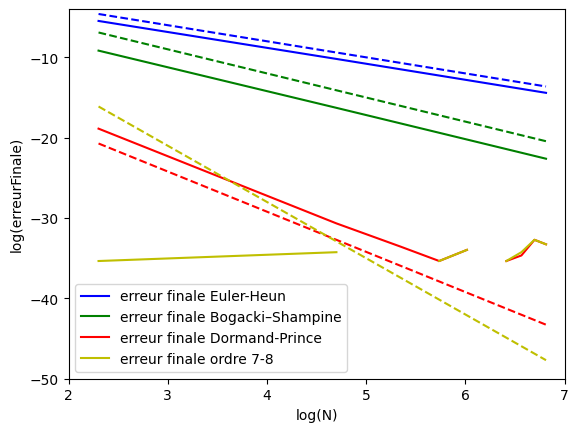

In [ ]:
from logging import NullHandler
def f(t,x):
    """fonction associée à l'ED"""
    return x

def sol(x):
    """Une solution exacte pour vérifier la méthode"""
    return(np.exp(x));

def erreurFinale(A,B,C, n):
    """Calcul de l'écart de la sol approchée et exacte au temps T pour différentes tailles de pas"""
    errl =[]
    for i in range(len(n)):
        temps, y1 = RK(T,n[i],A,B,C,f,y0)
        errl.append(np.log(np.absolute(sol(1)-y1[-1])))
    return(errl)

T=1
y0=1
N=100

n = np.array(range(10,1000,100))
nl = np.log(n)
colors = ['b','g','r','y']
i = 0
for method in methods:
  plt.plot(nl,erreurFinale(Adict[method],Bdict[method],Cdict[method], n),colors[i],label="erreur finale "+method)
  i+=1

ordre2 = np.log(np.array([i**(-2) for i in range(10,1000,100)]))
ordre3 = np.log(np.array([i**(-3) for i in range(10,1000,100)]))
ordre5 = np.log(np.array([i**(-5)*10**(-4) for i in range(10,1000,100)]))
ordre7 = np.log(np.array([i**(-7) for i in range(10,1000,100)]))
plt.plot(nl,ordre5,color="r", linestyle="--")
plt.plot(nl,ordre3,color="g", linestyle="--")
plt.plot(nl,ordre2,color="b", linestyle="--")
plt.plot(nl,ordre7,color="y", linestyle="--")

plt.axis([2, 7, -50,-4])
plt.xlabel("log(N)")
plt.ylabel("log(erreurFinale)")
plt.legend()
plt.show()

On a également affiché des droites en échelles logarithmique $y : x ↦ x^{-i}$ avec le code couleur suivant :
*   $i = 2$ pour les pointillées bleus ;
*   $i = 3$ pour les pointillées verts ;
*   $i = 5$ pour les pointillées rouges ;
*   $i = 7$ pour les pointillées jaunes.

On observe que les courbes d'erreurs finales suivent ont la même pente que ces droites. Cela renseigne de l'ordre de la méthode utilisée : 2 pour Euler-Heun ; 3 pour Bogacki-Shampine et 5 pour Dormand-Price.

On observe cependant que la méthode d'ordre 7-8 ne répond pas à ce comportement. Cela peut s'expliquer par la précision des floatants dans Python. Ces derniers sont codés avec 53 bits $[2]$. Ainsi, la plus petite erreur que l'on puisse manipuler est $ln\left(\frac{1}{2^{53}}\right) ≈ -36,7$. On voit que cela semble correspondre à la valeur à laquelle l'erreur de la méthode 7-8 est maintenue sur le graphique. \\
Il semble donc que l'erreur pour la méthode d'ordre 7-8 soit trop faible pour être calculée, mais on remarque tout de même qu'elle est plus faible que la méthode d'ordre 5 (Dormand-Price).

On voit ainsi la conséquence d'augmenter l'ordre de résolution : on augmente la précision de la simulation.

On s'attend tout de même à ce que le revers de la médaille soit que le temps d'execution soit plus important pour une méthode d'ordre plus élevé.

Nous avons donc réalisé un test rapide qui mesure le temps
moyen d'execution pour les différentes méthodes :

In [ ]:
#CELLULE LONGUE À EXÉCUTER
import time

def temps(A,B,C,N,nRep):
  meanTime = 0
  for i in range(nRep):
    a = time.time()
    RK(T,N,A,B,C,f,y0)
    meanTime = time.time() - a
  return meanTime/nRep

N=100
nRep = 5000
time.time()
method = "Euler-Heun"
print("Temps moyen pour N =", N,"avec", method,":", temps(Adict[method],Bdict[method],Cdict[method], N, nRep))
method = "Bogacki–Shampine"
print("Temps moyen pour N =", N,"avec", method,":", temps(Adict[method],Bdict[method],Cdict[method], N, nRep))
method = "Dormand-Prince"
print("Temps moyen pour N =", N,"avec", method,":", temps(Adict[method],Bdict[method],Cdict[method], N, nRep))
method = "ordre 7-8"
print("Temps moyen pour N =", N,"avec", method,":", temps(Adict[method],Bdict[method],Cdict[method], N, nRep))


Temps moyen pour N = 100 avec Euler-Heun : 3.424358367919922e-06
Temps moyen pour N = 100 avec Bogacki–Shampine : 6.177425384521485e-07
Temps moyen pour N = 100 avec Dormand-Prince : 5.685329437255859e-07
Temps moyen pour N = 100 avec ordre 7-8 : 9.435653686523437e-07


On remarque effectivement que plus l'ordre est élevé, plus la simulation prend du temps, ce qui est cohérent avec le fait que l'on effectue de plus en plus d'opération au fur et à mesure que l'on monte en ordre de résolution.

### *b. Méthodes RK à pas adaptatif*

Dans le cas de la simulation de trajectoires autour de planètes, avoir un pas fixe est problématique. En effet, lorsque le satelite est loin de toute planète, sa trajectoire ne varie relativement que très peu, un pas grand peu être adopté pour gagner en rapidité de calcul, et donc éventuellement en ordre utilisé. Au contraire, à proximité des planètes, le satelite peut être fortement accéléré, ce qui nécessite des pas plus fins.

Pour adapter le pas au milieu d'une même simulation, en s'inspirant de $[3]$, on calcule à chaque pas la valeur $y_{n+1}$ suivante de deux manière différentes. D'une part, $y_{n+1,k}$, avec une méthode d'un ordre $k$, d'une part, $y_{n+1,k+1}$, avec une méthode d'ordre $k+1$. On calcule alors l'erreur de $y_{n+1,k}$, en supposant que $y_{n+1,k+1}$ est la solution exacte.

Si cette erreur est plus grande qu'une tolérance choisie, on recommence cette étape de calcul en refusant cette valeur, mais en réduisant la taille du pas, pour ainsi réduire l'erreur. On recommence alors jusqu'à obtenir une erreur en dessous de la tolérance, puis on garde $y_{n+1,k+1}$. A l'inverse, si l'erreur est plus faible que nécessaire, on se permettra d'agrandir le pas à l'étape suivante (mais on conserve tout de même $y_{n+1,k+1}$).

Nous avons choisi de modifier le pas de manière proportionnelle au rapport de la tolérance d'erreur et l'erreur, en contrôlant tout de même que l'on n'ait pas de trop grandes variations. Nous nous sommes également interdits d'agrandir le pas au-delà de sa taille initiale.

In [ ]:
def RK_adapt_1d(T,N,A,B,C,f,y0,tol):
    h = T/N
    p = len(C)
    temps = [0]
    y = [y0]
    tab_h = [h]
    while temps[-1] < T:
        k = np.array([0.0 for i in range(p)])
        for j in range(p):
            k[j] = f(temps[-1] + C[j]*h,y[-1] + h*(k @ np.transpose(A[j])))
        a = h*(k @ np.transpose(B[0]))
        b = h*(k @ np.transpose(B[1]))

        if tol < abs(b-a): #On réduit le pas et on recommence sans avancer dans le temps
            h *= max(tol/abs(b-a), 0.8)
            continue
        tab_h.append(h)
        y.append(y[-1] + b)
        temps.append(temps[-1]+h)
        h = min(h*tol/abs(b-a),h*1.2,T/N)
    return(temps,y,tab_h)


Pour tester ce nouvel algorithme, on compare à nouveau les évolutions de l'erreur finale, cette fois pour une même méthode, avec et sans pas adaptatif.

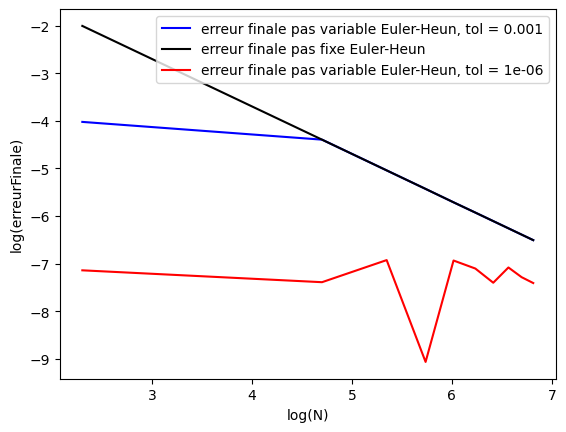

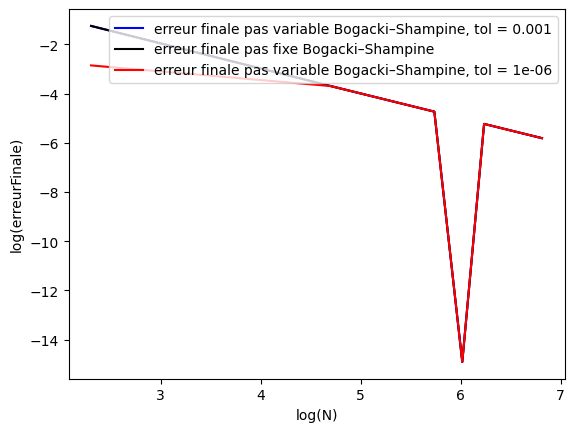

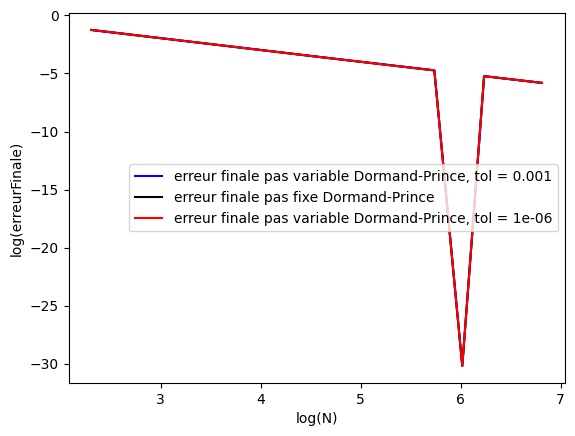

<ipython-input-4-40c9fc884506>:20: RuntimeWarning: divide by zero encountered in double_scalars
  h = min(h*tol/abs(b-a),h*1.2,T/N)


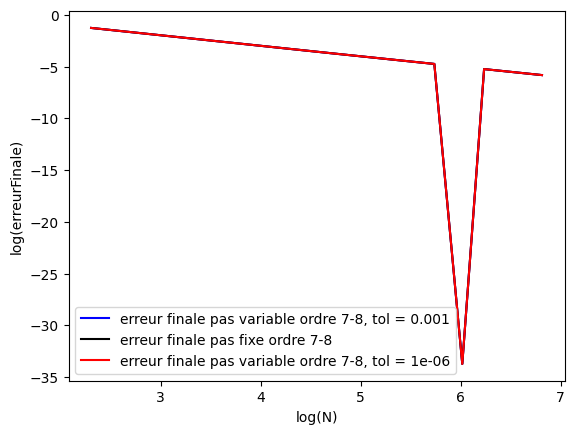

In [ ]:
def erreurFinale(A,B,C, n, tol):
    """Calcul de l'écart de la sol approchée et exacte au temps T pour différentes tailles de pas"""
    errl =[]
    for i in range(len(n)):
        temps, y1, h = RK_adapt_1d(T,n[i],A,B,C,f,y0,tol)
        errl.append(np.log(np.absolute(sol(1)-y1[-1])))
    return(errl)

T=1
y0=1
N=100
tol = 10**-6

n = np.array(range(10,1000,100))
nl = np.log(n)
for method in methods:
  plt.plot(nl,erreurFinale(Adict[method],Bdict[method],Cdict[method],n,10**-3),"b",label="erreur finale pas variable "+method+", tol = "+str(10**-3))
  plt.plot(nl,erreurFinale(Adict[method],Bdict[method],Cdict[method],n,1000),"k",label="erreur finale pas fixe "+method)
  plt.plot(nl,erreurFinale(Adict[method],Bdict[method],Cdict[method],n,10**-6),"r",label="erreur finale pas variable "+method+", tol = "+str(10**-6))

  plt.xlabel("log(N)")
  plt.ylabel("log(erreurFinale)")
  plt.legend()
  plt.show()

Ici on a effectué la résolution avec pas adaptatif, pour 2 tolérances différentes. On observe que l'erreur est plus faible pour les algorithmes à pas adaptatifs, et ce jusqu'à un point où la courbe de l'erreur rejoint celle de la méthode à pas fixe, si jamais cela est possible. (au prix de nombreuses opérations puisque N est alors grand)

### *c. Comparaison des deux méthodes : le cas du pendule simple*

Nous allons pousser un peu plus loin la comparaison des deux méthodes, sur un exemple plus complexe, le pendule simple.
Mettons d'abord en équation ce problème :

On a
$\frac{d^2\theta}{dt^2}=-\omega_0^2sin(\theta)$ avec $\omega_0^2 = \frac{g}{l}$.

On prend $g = l = M = 1$.

On pose $Y = \begin{pmatrix} \theta' \\ \theta \end{pmatrix}$, et alors on a l'équation :
$Y' = f(Y)$

où $f\begin{pmatrix} a \\ b \end{pmatrix}=\begin{pmatrix} -sin(b) \\ a \end{pmatrix}$.

L'énergie du système vaut pour tout $\theta$ :
$E=E_c+E_p=\frac{1}{2}Ml^2\frac{d\theta}{dt}^2 + Mgl(1-cos(\theta))=1-cos(\theta)+\frac{1}{2}\frac{d\theta}{dt}^2$

On commence par réécrire les deux méthodes à pas fixe et adaptif, pour les rendre compatibles à des valeurs vectorielles.

In [ ]:
# On définit des méthodes pour des fonctions vectorielles de dimension n

def RK_fixe(T,N,A,B,C,f,y0,n=2):
    h = T/N
    p = len(C)
    temps = np.linspace(0,T,N+1)
    y = [y0]
    for i in range(N):
        k = np.zeros((p,n))
        for j in range(p):
            k[j] = f(temps[-1] + C[j]*h,y[-1] + (h*(np.transpose(k) @ np.transpose(A[j]))))
        y.append(y[i] + h*(np.transpose(k) @ np.transpose(B[0])))
    return(temps,y)

def RK_adapt(T,N,A,B,C,f,y0,tol,n=2):
    h = T/N
    p = len(C)
    temps = [0]
    y = [y0]
    tab_h = [h]
    while temps[-1] < T:
        k = np.zeros((p,n))
        for j in range(p):
            k[j] = f(temps[-1] + C[j]*h,y[-1] + (h*(np.transpose(k) @ np.transpose(A[j]))))
        a = h*(np.transpose(k) @ np.transpose(B[0]))
        b = h*(np.transpose(k) @ np.transpose(B[1]))
        c = np.linalg.norm(a-b)
        if c > tol:
            h *= max(tol/c, 0.8)
        else:
            tab_h.append(h)
            y.append(y[-1] + b)
            temps.append(temps[-1]+h)
            h = min(h*tol/c,h*1.2,T/N)
    return(temps,y,tab_h)

def f(t,x):
    return np.array([-np.sin(x[1]),x[0]])

On va ensuite calculer la solution, pour un pas fixe puis adaptatif, et la comparer. Notamment, nous regardons l'énergie du système. Une energie totale constante, ou au moins ne variant que très peu, est le signe d'une simulation précise.

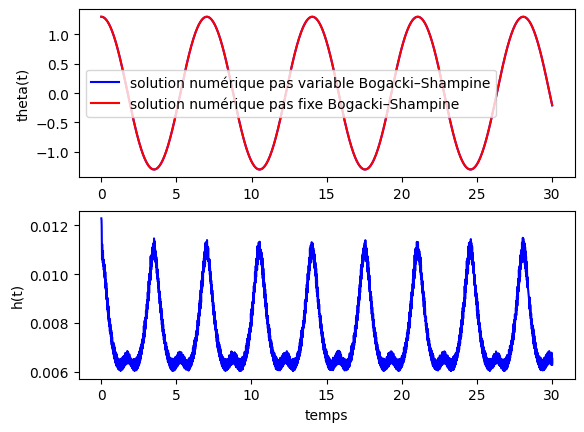

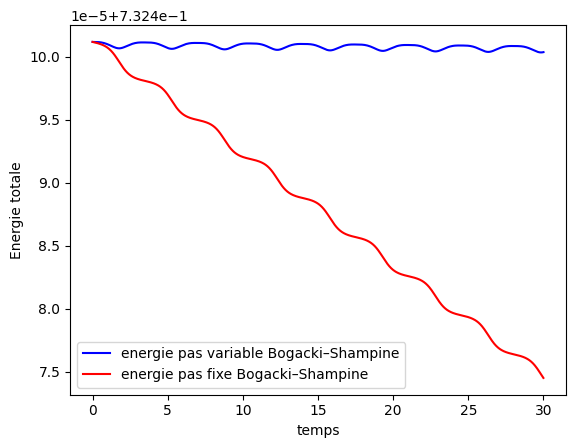

In [ ]:
method = "Bogacki–Shampine"
#Calcul avec et sans pas adaptatif, pour les même valeurs de T et N :
temps1, y1, tab_h = RK_adapt(30,1000,Adict[method],Bdict[method],Cdict[method],f,np.array([0,1.3]),10**(-8)) #tol = 10**-7
temps2, y2 = RK_fixe(30,1000,Adict[method],Bdict[method],Cdict[method],f,np.array([0,1.3]))

# Tracé solutions
y1 = np.array(y1)
theta1 = y1[:,1]
plt.subplot(2, 1, 1)
plt.plot(temps1,theta1,"b",label="solution numérique pas variable "+method)

y2 = np.array(y2)
theta2 = y2[:,1]
plt.plot(temps2,theta2,"r",label="solution numérique pas fixe "+method)

plt.ylabel("theta(t)")
plt.legend()


# Tracé pas
plt.subplot(2, 1, 2)
plt.plot(temps1[1:],tab_h[1:],"b")
plt.xlabel("temps")
plt.ylabel("h(t)")
plt.show()

# Calcul & tracé énergie
E1 = 1 - np.cos(theta1) + 0.5*y1[:,0]**2
E2 = 1 - np.cos(theta2) + 0.5*y2[:,0]**2

plt.plot(temps1,E1,"b",label="energie pas variable "+method)
plt.plot(temps2,E2,"r",label="energie pas fixe "+method)
plt.xlabel("temps")
plt.ylabel("Energie totale")
plt.legend()
plt.show()

La dernière figure montre l'évolution de l'énergie totale en fonction du temps. Ces deux méthodes sont relativement précises puisque l'on voit que la variation d'énergie est de l'ordre de $10^{-5}\, J$  alors que l'énergie est de l'ordre de $10^{-1}\, J$. Ainsi le rapport $\frac{ΔE}{E}$ est très faible. Cependant, on observe que la méthode à pas adaptif conserve mieux l'énergie, et est donc plus précise. On comprend alors l'importance d'adapter le pas dans ce cas de figure.

Pour illustrer ce changement de pas, la première figure représente la solution approchée ainsi que l'évolution du pas en fonction du temps dans la méthode à pas variable. On observe alors que le pas evolue périodiquement avec la même fréquence que $θ$. On remarque notamment que le pas devient grand lorsque $θ$ varie rapidement, puisque c'est le moment où il devient nécessaire d'être plus précis.


# II. Retour au problème initial

### *a. Equations physiques*

***Equations de mouvement dans un champ gravitationnel***

Pour rappel, on suppose ici qu'on a six planètes fixées, un satelite de position initiale fixe $(0,0)$, et de vitesse initiale de norme 1, orienté selon $\theta_0$. On cherche alors à atteindre un point cible.
Le problème est résumé dans la figure suivante :


In [ ]:
def choixPoint(x,y):
  plt.scatter([0],[0], color='blue',label="Départ")
  plt.scatter([x],[y], color='black',label="Cible")
  plt.scatter(M[:,0], M[:,1], color='red', label="Planètes")
  plt.legend()
  plt.title("Situation initiale")
  plt.show()

##Position des masses
M = np.array([[2,-1],
              [2,0],
              [2,1],
              [3,-1],
              [3,0],
              [3,1]])

##Position de l'objectif
objectif = (4,1)


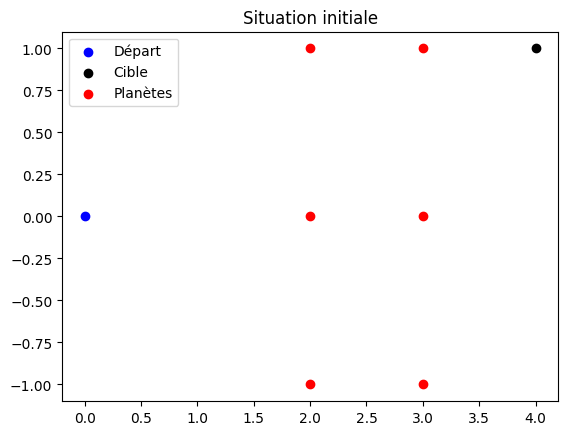

In [ ]:
choixPoint(4,1)

On supposera dans la suite du problème que le référentiel des six planètes est inertiel, et que le satellite $S$ n'est soumis qu'aux forces gravitationnelles de ces six planètes $(P_i)_{0\leq i\leq 5}$.

La force gravitationnelle exercée par $P_i$ sur le satellite vaut $\overrightarrow{F_{P_i \to sat}}=\frac{GMm\vec{r_i}}{\left|\left|\vec{r_i}\right|\right|^3}$ où $\vec{r_i} = \overrightarrow{SP_i}$. \\

En sommant les 6 forces, et en appliquant le principe fondamental de la dynamique, on obtient :
$$\vec a = ∑_{i=0}^5\frac{\vec{r_i}}{\left|\left|\vec{r_i}\right|\right|^3}$$
En projetant sur le plan $(Oxy)$ on obtient :
$$x''=∑_{i=0}^5\frac{x_i - x}{\left|\left|\vec{r_i}\right|\right|^3}$$\
$$y''=∑_{i=0}^5\frac{y_i - y}{\left|\left|\vec{r_i}\right|\right|^3}$$

On peut donc écrire l'équation différentielle sous la forme attendue pour la résolution numérique :

On pose $Y = \begin{pmatrix} x(t) \\ y(t) \\ x'(t) \\ y'(t)\end{pmatrix}$. On a alors :
$$Y' = f(Y)$$\
$$Y(0) = \begin{pmatrix} 0 \\ 0 \\ cos(\theta_0) \\ sin(\theta_0)\end{pmatrix}$$

Avec $f\begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix}=\begin{pmatrix} c \\ d \\ \sum_{i=1}^{6} \frac{x_{i}-a}{\left((x_i-a)^2+(y_i-b)^2\right)^{\frac{3}{2}}} \\ \sum_{i=1}^{6} \frac{y_{i}-b}{\left((x_i-a)^2+(y_i-b)^2\right)^{\frac{3}{2}}} \end{pmatrix}$.

Pour une planète $P_i$, l'énergie potentielle induite au satellite vaut ${E_p}_i = - \frac{GMm}{\left|\left|\vec{r_i}\right|\right|} = - \frac{1}{\left|\left|\vec{r_i}\right|\right|}$ (voir $[4]$)

Ainsi, l'énergie totale du satellite vaut :
$E=E_c+∑_{i=0}^5{E_p}_i = \frac{1}{2}\left|\left|\vec{v}\right|\right|^{2} - ∑_{i=0}^5\frac{1}{\left|\left|\vec{r_i}\right|\right|}$



### *b. Implémentation de f*

In [ ]:
def f(t,s):
    r = ((s[0] - M[:,0])**2 + (s[1] - M[:,1])**2)**(1/2)
    return np.array([s[2],s[3],sum((M[:,0] - s[0])/(r)**3),sum((M[:,1] - s[1])/(r)**3)])

# III. Recherche de la trajectoire optimale

### *a. Méthode RK utilisée pour la suite*

Pour la recherche des trajectoires optimales, nous réutilisons la méthode RK d'ordre le plus élevé (7-8) à pas adaptatif, adpatée à plusieurs variables. Nous avons décidé de poser des conditions d'arrêt à la simulation d'une trajectoire par la méthode RK. Ainsi, lorsque la particule en mouvement s'écrase sur un corps fixe, la simulation est arrêtée.

In [ ]:
def RK_regul(T,N,A,B,C,f,y0,tol, limPlanet = 0.1,n=2):
    h = T/N
    p = len(C)
    temps = [0]
    y = [y0]
    tab_h = [h]
    while temps[-1] < T:
        k = np.zeros((p,n))
        #k = np.array([[0.0,0.0] for i in range(p)])
        for j in range(p):
            k[j] = f(temps[-1] + C[j]*h,y[-1] + (h*(np.transpose(k) @ np.transpose(A[j]))))
        a = h*(np.transpose(k) @ np.transpose(B[0]))
        b = h*(np.transpose(k) @ np.transpose(B[1]))
        c = np.linalg.norm(a-b)
        if c > tol:
            h *= max(tol/c, 0.8)
        else:
            tab_h.append(h)
            y.append(y[-1] + b)
            temps.append(temps[-1]+h)
            if c!=0:
              h = min(h*tol/c,h*1.2,T/N)
            else:
              h = min(h*1.2,T/N)

            rupture = np.linalg.norm(y[-1][0:2]-M[0]) < limPlanet or np.linalg.norm(y[-1][0:2]-M[1]) < limPlanet \
            or np.linalg.norm(y[-1][0:2]-M[2]) < limPlanet or np.linalg.norm(y[-1][0:2]-M[3]) < limPlanet \
            or np.linalg.norm(y[-1][0:2]-M[4]) < limPlanet or np.linalg.norm(y[-1][0:2]-M[5]) < limPlanet

            if rupture:
              temps.append(-1)
              break;

    temps = np.array(temps)
    y = np.array(y)
    tab_h = np.array(tab_h)
    return (temps,y,tab_h)

Comme précédemment on peut tracer l'énergie du satellite pour vérifier la précision de la simulation.

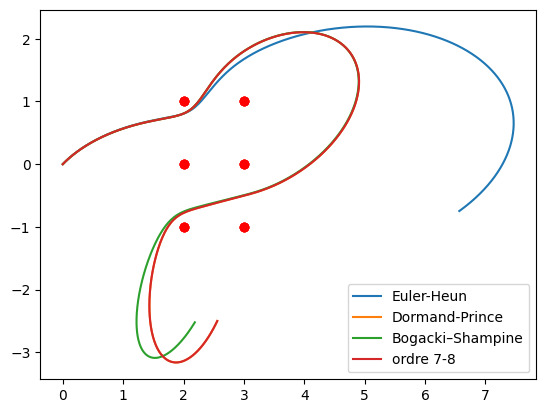

Euler-Heun: dE/E = 0.004098004531168393
Dormand-Prince: dE/E = 0.002532239826464544
Bogacki–Shampine: dE/E = 0.0025467831945493653
ordre 7-8: dE/E = 0.0025322718118209607


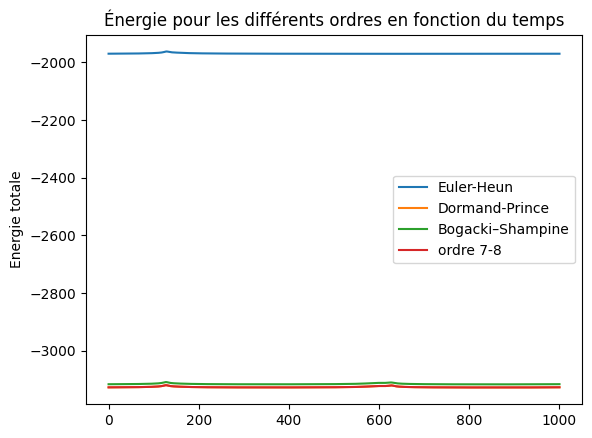

In [ ]:
a = np.pi/4
methods  = ["Euler-Heun", "Dormand-Prince", "Bogacki–Shampine", "ordre 7-8"]
E = []

for method in methods:
    s0 = [0,0,np.cos(a),np.sin(a)]
    temps1, slist1, tab_h = RK_regul(10, 1000, Adict[method], Bdict[method], Cdict[method], f, s0, 1, n=4)
    slist1 = np.array(slist1)

    E.append(0.5 * (slist1[:,2]**2 + slist1[:,3]**2) - np.sum([1 / ( (M[i,0] - slist1[:,0])**2 + (M[i,1] - slist1[:,1])**2 )**0.5 for i in range(6)]))

    plt.scatter(M[:,0], M[:,1], color='red')
    plt.plot(slist1[:,0],slist1[:,1], label=method)

plt.legend()
plt.show()
for i in range(4):
    plt.plot(E[i], label=methods[i])
    print(methods[i] + ": dE/E = " + str(abs((max(E[i]) - min(E[i]))/np.average(E[i]))))
plt.legend()
plt.title("Énergie pour les différents ordres en fonction du temps")
plt.ylabel("Energie totale")
plt.show()


On observe bien une énergie qui fluctue certes mais très peu en variation relative: $\frac{ΔE}{E} = 0.0025$

### *b. Balayage des trajectoires*

Le principe de base de l'algorithme est d'effectuer plusieurs simulations pour différents angles de départ, pour une position initiale et une norme de vitesse initiale fixées.

In [ ]:
method = "ordre 7-8"

In [ ]:
def balayage(n):
  angles = np.linspace(np.pi/2,-np.pi/2,n)
  plt.scatter(M[:,0], M[:,1], color='red')
  for a in angles:
    s0 = [0,0,np.cos(a),np.sin(a)]
    temps1, slist1, tab_h = RK_regul(10, 1000, Adict[method], Bdict[method], Cdict[method], f, s0, 1, n=4)
    slist1 = np.array(slist1)
    plt.plot(slist1[:,0],slist1[:,1])
  plt.title("n angles initiaux")
  plt.show()

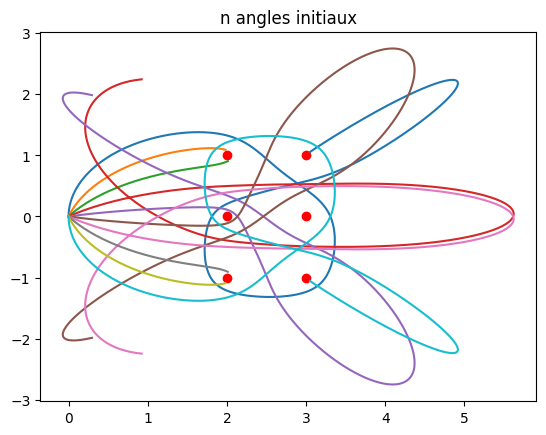

In [ ]:
balayage(10)

On observe justement que lorsque des trajectoires passent trop près d'une planète, elles s'arrêtent.

Désormais, on va pour chacune des trajectoires calculées, déterminer le point et l'instant où la particule est la plus proche de l'objectif.

In [ ]:
def balayage(objectif,n):
  angles = np.linspace(np.pi/2,-np.pi/2,n)
  fig, ax = plt.subplots()
  ax.scatter(objectif[0],objectif[1], color='black',label="Cible")
  ax.scatter(M[:,0], M[:,1], color='red')
  for a in angles:
    s0 = [0,0,np.cos(a),np.sin(a)]
    temps1, slist1, tab_h = RK_regul(2.5, 200, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-4), n=4)
    slist1 = np.array(slist1)
    minNorm = float("inf")
    index = 0
    for i in range(len(slist1)):
      norme = (slist1[i,0]-objectif[0])**2 + (slist1[i,1]-objectif[1])**2
      if norme < minNorm:
        minNorm = norme
        index = i
    print(minNorm, temps1[index-1])
    ax.plot(slist1[:,0],slist1[:,1])
    ax.scatter(slist1[index,0],slist1[index,1], color="green")
  plt.axis("equal")
  plt.title("n angles initiaux et points les plus proches de la cible")
  plt.show()

distance minimale temps d'atteinte
1.2383576595750623 2.375
2.2056652175889955 2.037499999999995
3.9829594861338933 1.4999999999999967
4.3246729653293565 1.3499999999999972
4.073587571918735 1.2749999999999975
0.05557300235522901 2.174999999999997
0.23310043107171685 1.7624999999999957
1.7724954694905348 1.437499999999997
3.6114677945246516 1.3624999999999972
5.070255655650861 1.0499999999999983
5.277473791404991 1.0499999999999983
0.5213327200873578 1.6374999999999962
1.9927746818378795 1.437499999999997
3.987271951722423 1.5124999999999966
3.9590976265035174 2.4875000000000016
7.76467249332581 1.2749999999999975
8.380796568696766 1.3499999999999972
8.35721064579797 1.4999999999999967
2.1566613666151517 2.1249999999999964
1.3721477889699698 2.4875000000000016


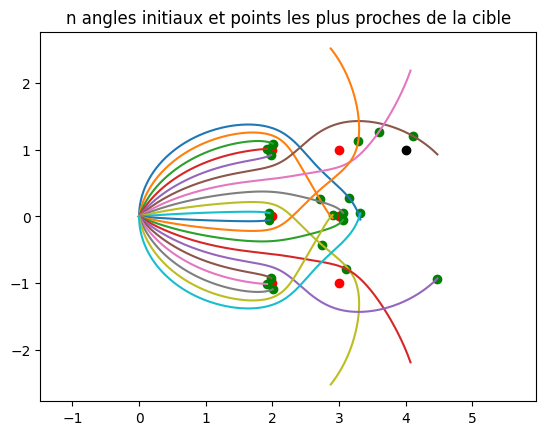

In [ ]:
print("distance minimale", "temps d'atteinte")
balayage(np.array([4,1]),20)

Cette première approche nous invite alors à chercher des trajectoires autour des trajectoires qui arrivent au plus proche de l'objectif (affinage). Ici on pourrait par exemple se concentrer autour de la trajectoire marron, rose et orange.

### *c. Raffinage*

**Attention, cellules longues à exécuter**

Après plusieurs tentatives, l'idée que nous avons selectionnée est d'effectuer une recherche par distance, puis par temps. En effet, le travail mené plus tôt semble indiquer que plusieurs chemins sont possibles pour atteindre l'objectif, mais que tous ne seront pas égaux en terme de temps de trajet.

Ainsi, nous allons d'abord identifier avec le plus de précision possible les angles qui font arriver la particule sur l'objectif (dans une boule de rayon donné), puis comparer le temps de parcours entre ses différentes trajectoires selectionnées, pour determiner la plus efficace.

La première étape est la plus délicate, et la plus chronophage. Nous allons utiliser un algorithme de Golden Search. Pour cela, nous calculons les distances minimales le long de chaque trajectoire obtenue après un premier balayage (cf partie précédente). Cela nous donne une courbe de la distance minimale en fonction de l'angle initial (avec l'angle une variable discrète). Alors pour chaque minimum local, on applique l'algorithme de Golden Search qui nous permet d'affiner ce minimum et de trouver l'angle initial pour lequel il est effectivement atteint. Dans la plupart des cas, ce minimum local vaudra 0 car en variant l'angle intial continument, on finit par tomber pile sur l'objectif. Les seules exceptions sont les cas de collision avec une planète.

In [ ]:
import numpy as np
import math

def GoldenS(fun,A,B,tol,N=100):
    nfeval = 0
    lbhist = []
    ubhist = []
    x1hist = []
    x2hist = []
    lb = A
    ub = B
    lbhist.append(lb)
    ubhist.append(ub)
    cleft = 1 # we evaluate for the left point or not
    cright = 1 # we evaluate for the right point or not
    lam = (np.sqrt(5)+1)/2
    ratio = lam/(lam+1)
    while (ub-lb)>tol:
        x1 = (ratio)*lb+(1-ratio)*ub
        x2 = (1-ratio)*lb+(ratio)*ub
        if cleft==1:
            v1 = fun(x1)
            nfeval = nfeval+1
            if nfeval>=N:
                break
        if cright==1:
            v2 = fun(x2)
            nfeval = nfeval+1
        if v1<=v2:
            ub=x2
            cleft=1
            cright=0
            v2=v1
        else:
            lb=x1
            cleft=0
            cright=1
            v1=v2
        lbhist.append(lb)
        ubhist.append(ub)
        x1hist.append(x1)
        x2hist.append(x2)
        if nfeval>=N:
                break
    return np.array(lbhist),np.array(ubhist),np.array(x1hist),np.array(x2hist),nfeval

maxN = 100   # Number of function evaluations
tol = 1e-16

def g(a):
  s0 = [0,0,np.cos(a),np.sin(a)]
  temps, slist, tab_h = RK_regul(2.5, 10000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-6), n=4)
  return np.min(((slist[:,0]-objectif[0])**2 + (slist[:,1]-objectif[1])**2)**(1/2))


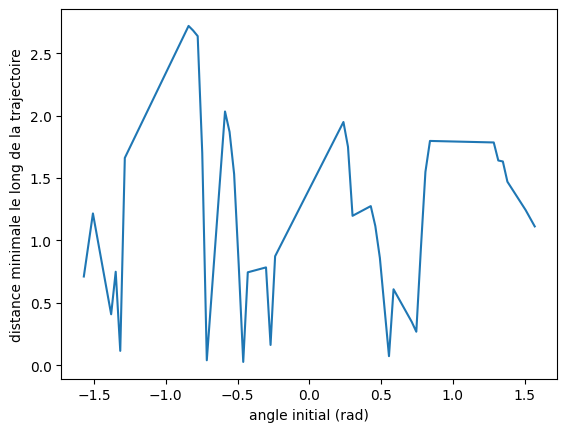

recherche entre : 0.7139983303613165 et 0.7774648486156558
recherche entre : 0.5235987755982987 et 0.5870652938526381
recherche entre : 0.26973270258094173 et 0.42839899821678995
recherche entre : -0.30146596170811146 et -0.23799944345377222
recherche entre : -0.4918655164711292 et -0.42839899821678995
recherche entre : -0.7457315894884862 et -0.5870652938526382
recherche entre : -1.348663512904709 et -1.28519699465037
recherche entre : -1.5073298085405575 et -1.348663512904709
Angle 1 trouvé : 0.7322020859260335 distance : 0.0023532801044231755 ; temps : 2.063999999999999
Angle 2 trouvé : 0.5512838356200226 distance : 0.00422417914343068 ; temps : 1.9200000000000015
Angle 3 trouvé : 0.3285687524715827 distance : 0.0030140446003148478 ; temps : 2.0220000000000007
Angle 4 trouvé : -0.27488193905021285 distance : 0.003754318278552325 ; temps : 1.9140000000000015
Angle 5 trouvé : -0.46122860390822984 distance : 0.0023207384666270115 ; temps : 2.153999999999996
Angle 6 trouvé : -0.58707377

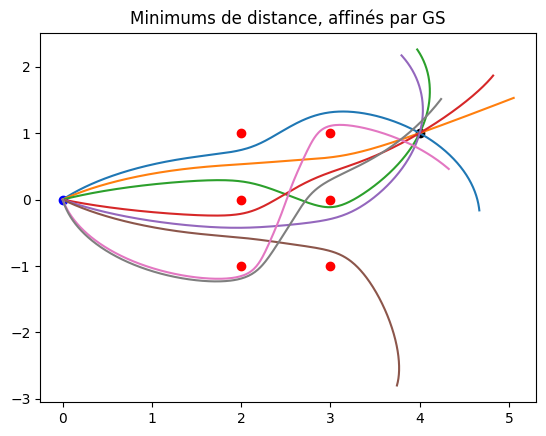

In [ ]:
## CELLULE LONGUE À EXÉCUTER (14 min)

import matplotlib.pyplot as plt

def balayage(objectif,n,maxN):
    angles = np.linspace(np.pi/2,-np.pi/2,n)
    angles_distances = []
    for a in angles:
        s0 = [0,0,np.cos(a),np.sin(a)]
        temps, slist, tab_h = RK_regul(3, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-3), n=4)
        if temps[-1] > 0 :
          distancemin = np.min(((slist[:,0]-objectif[0])**2 + (slist[:,1]-objectif[1])**2)**(1/2))
          angles_distances.append((a,distancemin))
    angles_distances = np.array(angles_distances)

    plt.plot(angles_distances[:,0],angles_distances[:,1])
    plt.xlabel("angle initial (rad)")
    plt.ylabel("distance minimale le long de la trajectoire")
    plt.show()

    candidats = []
    for i in range(len(angles_distances)-2):
      if angles_distances[i][1] > angles_distances[i+1][1] and angles_distances[i+1][1] < angles_distances[i+2][1]:
        print("recherche entre :",angles_distances[i+2][0],"et",angles_distances[i][0])
        lbtab,ubtab,x1s,x2s,nfeval = GoldenS(g,angles_distances[i+2][0],angles_distances[i][0],tol=10**(-16),N=maxN)
        candidats.append(0.5*(ubtab[-1]+lbtab[-1])) #On prend le milieu de l'intervalle renvoyé par GS = minimum avéré de la fonction

    plt.scatter(objectif[0], objectif[1], color='black',label="Cible")
    plt.scatter(0,0, color='blue',label="Départ")
    plt.scatter(M[:,0], M[:,1], color='red')
    ind_angle=0
    for a in candidats:
        s0 = [0,0,np.cos(a),np.sin(a)]
        temps, slist, tab_h = RK_regul(3, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-3), n=4)
        ind_angle+=1
        plt.plot(slist[:,0],slist[:,1])
        print("Angle "+str(ind_angle)+" trouvé : "+str(a),end="")
        liste_distances = ((slist[:,0] - objectif[0])**2 + (slist[:,1] - objectif[1])**2)**(1/2)
        indice_min = np.argmin(liste_distances)
        distancemin = liste_distances[indice_min]
        tempsmin = temps[indice_min]
        if distancemin < 0.1:
          print(" distance : " + str(distancemin) +" ; temps : " + str(tempsmin))
        else:
          print()
    plt.title("Minimums de distance, affinés par GS")
    plt.show()

balayage(objectif,100,20)


On affiche ici la fonction donnant la distance minimale de la trajectoire à l'objectif pour chaque angle de départ, et on observe bien plusieurs minima. À condition d'évaluer cette fonction avec une discrétisation suffisamment précise (ce qui est raisonnable puisqu'on ne l'évalue en entier qu'une fois), on peut faire l'hypothèse proche de la réalité que l'on ne ratera pas de minimum réel en cherchant autour des minima visibles.

C'est ensuite la recherche Golden Search: les angles de recherches affichés sont les limites hautes et basses de chaque minimum rencontré ("haut-bas-haut"). Pour chaque minimum, on donne l'angle final trouvé, la distance minimale à l'objectif de la trajectoire correspondante et le temps d'atteinte de cette distance minimale.

Les angles 2 et 4 semblent les meilleurs candidats, on va donc affiner la recherche autour de ces angles pour améliorer la précision.

Nouveau raffinage de l'angle 2: -0.27488012522424266
Angle 2 : distance : 0.00016906023672975194 ; temps : 1.9159999999998543
Nouveau raffinage de l'angle 4: 0.5512840827403813
Angle 4 : distance : 6.405997996383782e-05 ; temps : 1.917599999999854


[]

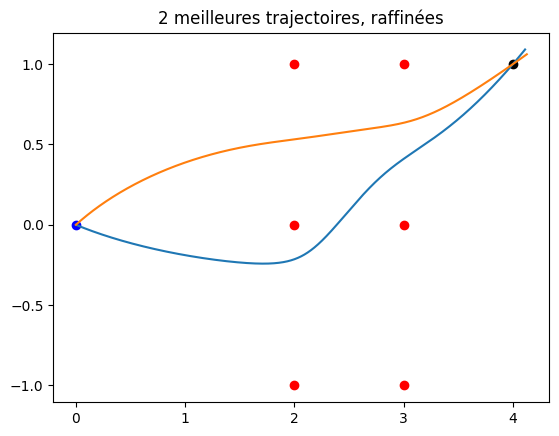

In [ ]:
## CELLULE LONGUE À EXÉCUTER (10min)
lbtab,ubtab,x1s,x2s,nfeval = GoldenS(g,-0.2749, -0.2748,tol=10**(-16),N=100)
a = 0.5*(ubtab[-1]+lbtab[-1])
print("Nouveau raffinage de l'angle 2: " + str(a))
s0 = [0,0,np.cos(a),np.sin(a)]
temps, slist, tab_h = RK_regul(2, 5000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-6), n=4)
plt.plot(slist[:,0],slist[:,1])
liste_distances = ((slist[:,0] - objectif[0])**2 + (slist[:,1] - objectif[1])**2)**(1/2)
indice_min = np.argmin(liste_distances)
distancemin = liste_distances[indice_min]
tempsmin = temps[indice_min]
print("Angle 2 : distance : " + str(distancemin) +" ; temps : " + str(tempsmin))

lbtab,ubtab,x1s,x2s,nfeval = GoldenS(g, 0.5512, 0.5514,tol=10**(-16),N=100)
b = 0.5*(ubtab[-1]+lbtab[-1])
print("Nouveau raffinage de l'angle 4: " + str(b))
s0 = [0,0,np.cos(b),np.sin(b)]
temps, slist, tab_h = RK_regul(2, 5000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-6), n=4)
plt.plot(slist[:,0],slist[:,1])
liste_distances = ((slist[:,0] - objectif[0])**2 + (slist[:,1] - objectif[1])**2)**(1/2)
indice_min = np.argmin(liste_distances)
distancemin = liste_distances[indice_min]
tempsmin = temps[indice_min]
print("Angle 4 : distance : " + str(distancemin) +" ; temps : " + str(tempsmin))

plt.scatter(objectif[0], objectif[1], color='black',label="Cible")
plt.scatter(0,0, color='blue',label="Départ")
plt.scatter(M[:,0], M[:,1], color='red')
plt.title("2 meilleures trajectoires, raffinées")

plt.plot()

On remarque alors que l'angle initial $\theta_0 = -0.27488012522424266 \, rad$ est le plus efficace.
Pour finir, nous tentons d'affiner encore plus la recherche pour maximiser la précision.

Dernier raffinage de l'angle: -0.2748801252155352
Minimum distance : 0.00016906023673444854 ; temps : 1.9159999999998543


[]

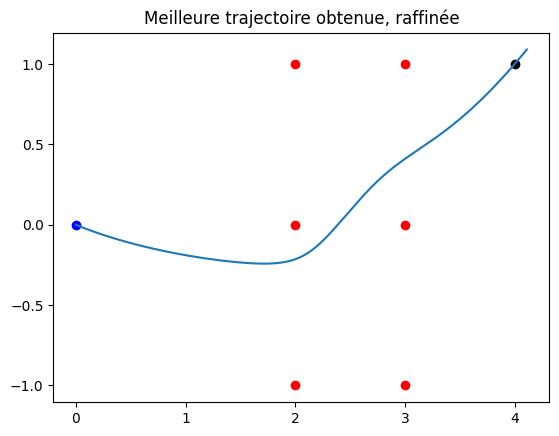

In [ ]:
## CELLULE LONGUE À EXÉCUTER (3min)

def g(a):
  s0 = [0,0,np.cos(a),np.sin(a)]
  temps, slist, tab_h = RK_regul(2.5, 10000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-8), n=4)
  return np.min(((slist[:,0]-objectif[0])**2 + (slist[:,1]-objectif[1])**2)**(1/2))


lbtab,ubtab,x1s,x2s,nfeval = GoldenS(g,-0.274882, -0.274880,tol=10**(-16),N=100)
a = 0.5*(ubtab[-1]+lbtab[-1])
print("Dernier raffinage de l'angle: " + str(a))
s0 = [0,0,np.cos(a),np.sin(a)]
temps, slist, tab_h = RK_regul(2, 5000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-10), n=4)
plt.plot(slist[:,0],slist[:,1])
liste_distances = ((slist[:,0] - objectif[0])**2 + (slist[:,1] - objectif[1])**2)**(1/2)
indice_min = np.argmin(liste_distances)
distancemin = liste_distances[indice_min]
tempsmin = temps[indice_min]
print("Minimum distance : " + str(distancemin) +" ; temps : " + str(tempsmin))

plt.scatter(objectif[0], objectif[1], color='black',label="Cible")
plt.scatter(0,0, color='blue',label="Départ")
plt.scatter(M[:,0], M[:,1], color='red')
plt.title("Meilleure trajectoire obtenue, raffinée")

plt.plot()

## Conclusion

Nous réalisons ici l'optimisation de notre fonction cible "f(angle de départ) = temps de parcours" en deux temps, en décomposant cette fonction en une fonction "angle-distance" dont on trouve les multiples minimums, puis en réalisant une optimisation discrète (qui est plus une sélection) de ces minimums sur le critère du temps de parcours.

Cette approche est très précise, bien que très lourde en calculs à cause de la difficulté de calculer lla relation "angle-distance à la cible".

Pour augmenter encore la précision, ou en tout cas avoir une marge d'erreur minimale sur le temps final de trajet, il faudrait prendre en compre la discrétisation des positions à proximité de la cible. En effet, le pas étant discret et surtout adaptatif, sélectionner le point de la trajectoire simulée le plus proche de la cible et prendre l'instant $t$ associé à ce point ne garantit pas que cet instant soit l'instant réel de passage le plus proche. Si ce point se situe dans une ligne relativement droite de la trajectoire, le pas adaptatif sera grand et donc on aura encore moins de chances de tomber au plus proche de la cible.

Il faudrait donc, une fois la trajectoire simulée, resimuler la trajectoire sur une petite zone allant de l'amont à l'aval de la cible, avec un pas petit, et ainsi trouver l'instant le plus précis de passage proche. \\
Une autre technique consisterait à faire l'approximation d'une vitesse constante entre deux points consécutifs de la simulation, proches de la cible et situés l'un en amont et l'autre en aval, et d'utiliser la relation $v = \frac{d}{t}$ pour améliorer la précision de cet instant. On calculerait alors la projection de la cible sur le segment reliant ces points et la distance de cette projection au premier des deux, associée à la vitesse connue, nous donnerait une bonne estimation du temps.

On propose ici une implémentation de ce système:

In [ ]:
def temps_mini(liste_dist,liste_temps,slist,objectif):
  #On trouve les deux points les plus proches
  indicemin_A = np.argmin(liste_dist)
  liste_dist2 = liste_dist[:]
  liste_dist2[indicemin_A] = np.inf
  indicemin_B = np.argmin(liste_dist2)

  #On calcule la projection de la cible sur le segment entre ces deux points, que l'on normalise
  A = slist[indicemin_A,0:2]
  B = slist[indicemin_B,0:2]
  AB = np.linalg.norm(B-A)
  AO = np.linalg.norm(objectif-A)
  alpha = np.dot(B-A,np.array(objectif)-A)/(AB**2) #Produit scalaire ramené en termes de proportion sur AB.

  #Enfin, on calcule le temps lorsque l'on est en la position de cette projection, en faisant l'approximation d'un temps linéaire entre les deux points.
  tempsmin = liste_temps[indicemin_B]*alpha + liste_temps[indicemin_A]*(1-alpha)
  P = B*alpha + A*(1-alpha)

  plt.scatter(A[0],A[1],label="A")
  plt.scatter(B[0],B[1],label="B")
  plt.scatter(objectif[0],objectif[1],label="objectif")
  plt.plot([A[0],B[0]],[A[1],B[1]])
  plt.plot([P[0],objectif[0]],[P[1],objectif[1]])
  plt.legend()
  plt.show()
  print("Temps A : " + str(liste_temps[indicemin_A]))
  print("Temps B : " + str(liste_temps[indicemin_B]))
  print("Projection normalisée entre les deux : " +str(alpha))

  return tempsmin


On l'applique aux deux angles que l'on avait trouvés:

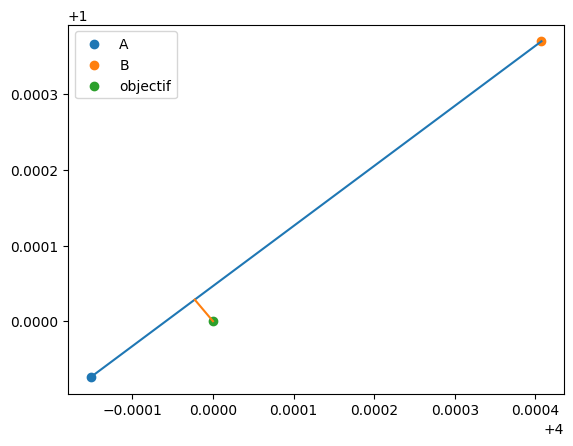

Temps A : 1.9159999999998543
Temps B : 1.9163999999998542
Projection normalisée entre les deux : 0.23114235862972188
Temps minimum réel : 1.916092456943306


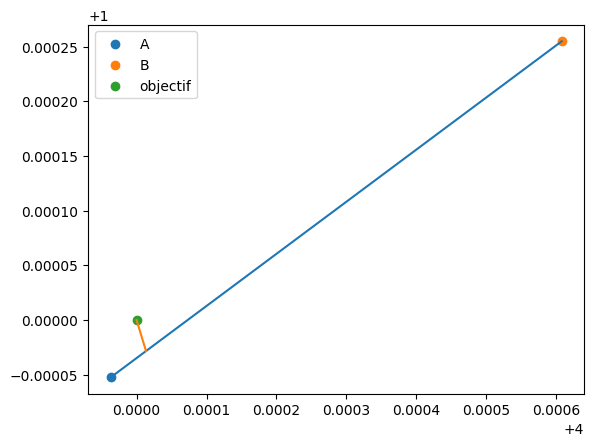

Temps A : 1.917599999999854
Temps B : 1.917999999999854
Projection normalisée entre les deux : 0.0781946304024066
Temps minimum réel : 1.917631277852015


In [ ]:
a = -0.2748801252155352
s0 = [0,0,np.cos(a),np.sin(a)]
temps, slist, tab_h = RK_regul(2, 5000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-10), n=4)

liste_distances = ((slist[:,0] - objectif[0])**2 + (slist[:,1] - objectif[1])**2)**(1/2)
tempsmin = temps_mini(liste_distances,temps,slist,objectif)
print("Temps minimum réel : " + str(tempsmin))

a = 0.5512840827403813
s0 = [0,0,np.cos(a),np.sin(a)]
temps, slist, tab_h = RK_regul(2, 5000, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-10), n=4)

liste_distances = ((slist[:,0] - objectif[0])**2 + (slist[:,1] - objectif[1])**2)**(1/2)
tempsmin = temps_mini(liste_distances,temps,slist,objectif)
print("Temps minimum réel : " + str(tempsmin))

On observe bien une amélioration de la précision sur le temps, on a ici représenté un zoom sur la zone proche de la cible pour visualiser précisément l'erreur que l'on aurait fait sur le temps. On conserve la même solution au problème.
La méthode fonctionne bien, et donne un temps plus précis à condition de considérer que la vitesse est constante entre A et B.
On notera que cette méthode fonctionnerait également si A et B étaient dans l'autre sens, et même dans une certaine mesure si ces deux points n'étaient pas "de part et d'autre" de la cible. Ce cas n'arrive cependant quasiment jamais au vu de ltaille quasi constante du pas dans cette zone.

# IV. Extension de la simulation

Nous allons étendre l'utilisation de ces méthodes RK à d'autres problèmes de gravitation.

## Système Terre-Soleil

Ici, nous nous intéressons d'abord à la Terre soumise à la seule force de gravitation du Soleil supposé fixe en $(0,0)$. On suppose que toutes les masses valent 1, tout comme la constante $G$ de gravitation.
Rapidement, en reprenant la mise en équation effectuée précédement, on trouve que le mouvement de la Terre est décrit par l'équation différentielle suivant :
$$Y' = f(Y)$$\
$$Y(0) = \begin{pmatrix} x_0 \\ y_0 \\ v_0cos(\theta_0) \\ v_0sin(\theta_0)\end{pmatrix}$$

Avec $Y = \begin{pmatrix} x(t) \\ y(t) \\ x'(t) \\ y'(t)\end{pmatrix}$ et $f\begin{pmatrix} a \\ b \\ c \\ d \end{pmatrix}=\begin{pmatrix} c \\ d \\ \frac{-a}{\left(a^2+b^2\right)^{\frac{3}{2}}} \\ \frac{-b}{\left(a^2+b^2\right)^{\frac{3}{2}}} \end{pmatrix}$.

L'énergie totale de la Terre vaut alors:
$E=E_c+E_p=\frac{1}{2}(x'(t)^2+y'(t)^2) - \frac{1}{\sqrt{x(t)^2+y(t)^2}}$\
On distingue alors 3 régimes :


*   Le régime subcritique pour $E<0$, correspondant à un état lié, et à une trajctoire elliptique
*   Le régime critique pour $E=0$, correspondant à une trajectoire parabolique
* Le régime surcritique pour $E>0$, correspondant à un trajectoire hyperbolique



On implémente alors cette fonction $f$, et on redéfinit la méthode RK classique avec pas variationnel :

In [10]:
def f(t,s):
    r = ((s[0])**2 + (s[1])**2)**(1/2)
    return np.array([s[2],s[3], -s[0]/(r)**3, -s[1]/(r)**3])

method = "ordre 7-8"


def RK_orbite(T,N,A,B,C,f,y0,tol,n=8):
    h = T/N
    p = len(C)
    temps = [0]
    y = [y0]
    tab_h = [h]
    while temps[-1] < T:
        k = np.zeros((p,n))
        #k = np.array([[0.0,0.0] for i in range(p)])
        for j in range(p):
            k[j] = f(temps[-1] + C[j]*h,y[-1] + (h*(np.transpose(k) @ np.transpose(A[j]))))
        a = h*(np.transpose(k) @ np.transpose(B[0]))
        b = h*(np.transpose(k) @ np.transpose(B[1]))
        c = np.linalg.norm(a-b)
        if c > tol:
            h *= max(tol/c, 0.8)
        else:
            tab_h.append(h)
            y.append(y[-1] + b)
            temps.append(temps[-1]+h)
            h = min(h*tol/c,h*1.2,T/N)
    temps = np.array(temps)
    y = np.array(y)
    tab_h = np.array(tab_h)
    return (temps,y,tab_h)

On commencer par tester le programme en se plaçant en régime sub-critique. On va simuler des orbites plus ou moins elliptiques pour observer la précision des calculs.

On commence avec $\left|\left|\vec{v_0}\right|\right| = 1$ et $(x_0,y_0) = (-1,0)$. On affiche ensuite l'énergie du système pour vérifier la précision du calcul.

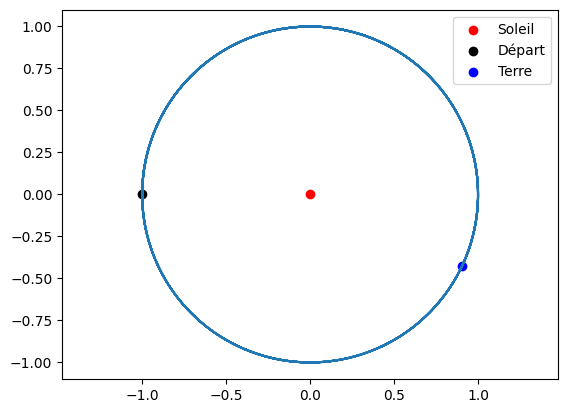

0.44916224479675293


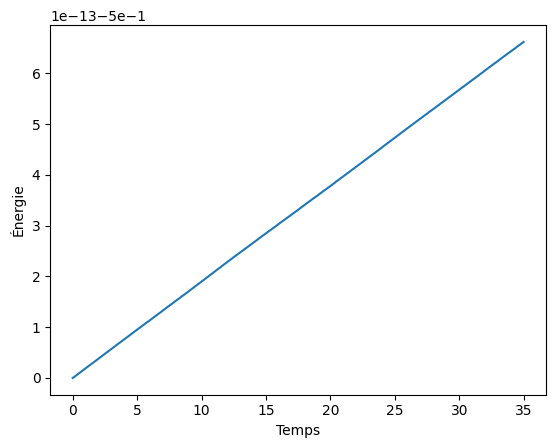

In [11]:
import time

a = time.time()
s0 = [-1,0,np.cos(np.pi/2),np.sin(np.pi/2)]
temps, slist, tab_h = RK_orbite(35, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-3), n=4)
plt.plot(slist[:,0],slist[:,1])
plt.scatter(0,0,color="red", label="Soleil")
plt.scatter(-1,0,color="black", label="Départ")
plt.scatter(slist[-1][0],slist[-1][1],color="blue", label="Terre")
plt.axis('equal')
plt.legend()
plt.show()
b=time.time()
print(b-a)

energie = []
for X in slist:
  energie.append(0.5*(X[2]**2 + X[3]**2) - 1/np.sqrt(X[0]**2 + X[1]**2))
plt.plot(temps, energie)
plt.ylabel("Énergie")
plt.xlabel("Temps")
plt.show()


On prend désormais un angle initial $\theta_0 = \frac{\pi}{3}$ avec $\left|\left|\vec{v_0}\right|\right| = 1$ et $(x_0,y_0) = (-1,0)$. \\
On obtient alors un orbite elliptique avec une plus grande excentricité.

On affiche ensuite l'énergie du système pour vérifier la précision du calcul.

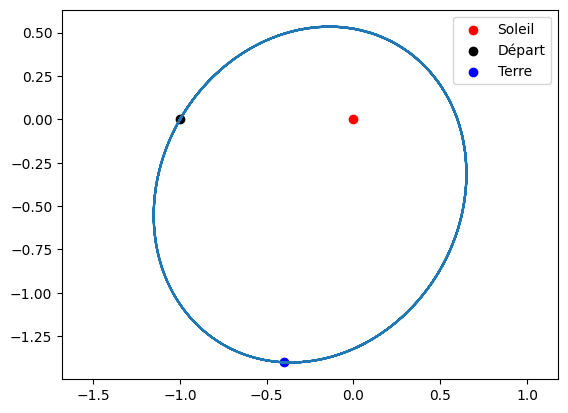

0.2809739112854004


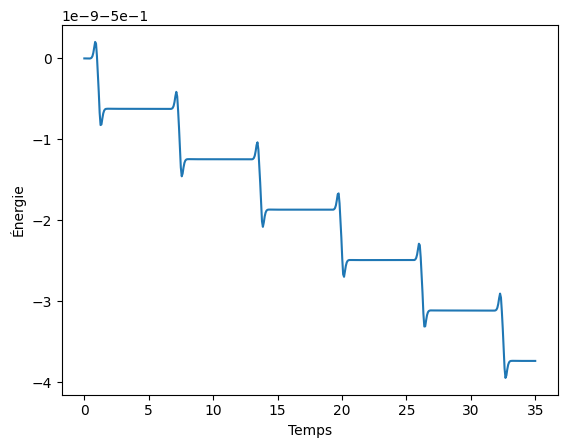

In [12]:
a = time.time()
s0 = [-1,0,np.cos(np.pi/3),np.sin(np.pi/3)]
temps, slist, tab_h = RK_orbite(35, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-3), n=4)
plt.plot(slist[:,0],slist[:,1])
plt.scatter(0,0,color="red", label="Soleil")
plt.scatter(-1,0,color="black", label="Départ")
plt.scatter(slist[-1][0],slist[-1][1],color="blue", label="Terre")
plt.axis('equal')
plt.legend()
plt.show()
b=time.time()
print(b-a)

energie = []
for X in slist:
  energie.append(0.5*(X[2]**2 + X[3]**2) - 1/np.sqrt(X[0]**2 + X[1]**2))
plt.plot(temps, energie)
plt.ylabel("Énergie")
plt.xlabel("Temps")
plt.show()


On augmente encore l'excentricité de l'ellipse avec un angle initial $\theta_0 = 0.1$ avec $\left|\left|\vec{v_0}\right|\right| = 1$ et $(x_0,y_0) = (-1,0)$. \\

On affiche ensuite l'énergie du système pour vérifier la précision du calcul.

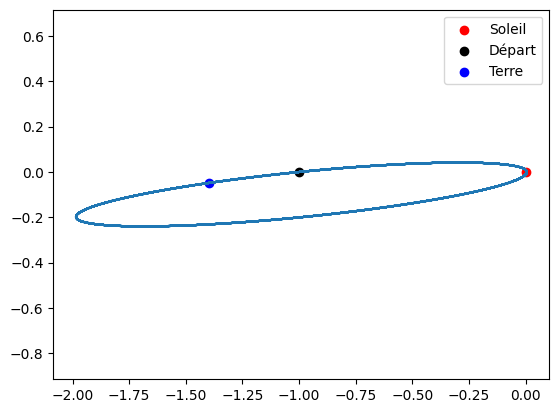

1.2018895149230957


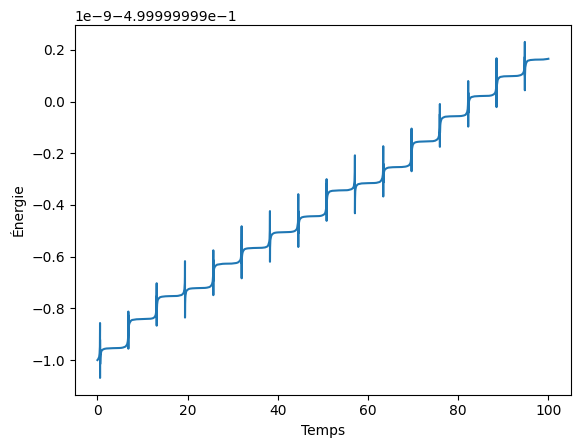

In [13]:
a = time.time()
s0 = [-1,0,np.cos(0.1),np.sin(0.1)]
temps, slist, tab_h = RK_orbite(100, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-12), n=4)
plt.plot(slist[:,0],slist[:,1])
plt.scatter(0,0,color="red", label="Soleil")
plt.scatter(-1,0,color="black", label="Départ")
plt.scatter(slist[-1][0],slist[-1][1],color="blue", label="Terre")
plt.axis('equal')
plt.legend()
plt.show()
b=time.time()
print(b-a)

energie = []
for X in slist:
  energie.append(0.5*(X[2]**2 + X[3]**2) - 1/np.sqrt(X[0]**2 + X[1]**2))
plt.plot(temps, energie)
plt.ylabel("Énergie")
plt.xlabel("Temps")
plt.show()

On voit que les énergies sont de l'ordre de $5.10^{-1}\, J$ comme on peut le calculer avec les conditions initiales. On voit que les variations d'énergie sont de l'ordre de $10^{-13}$, ce qui montre que la précision de la méthode est très bonne.

Nous souhaitons comparer la précision des méthodes en fonction de l'ordre. Pour cela, nous décidons de nous placer en régime critique initialement, et d'analyser l'évolution de l'énergie en fonction du temps, d'une part pour une méthode "Dormand-Prince", et d'autre part pour une méthode d'ordre 7-8.

On se place alors dans les conditions initiales $\left|\left|\vec{v_0}\right|\right| = \sqrt{2}$ et $(x_0,y_0) = (-1,0)$

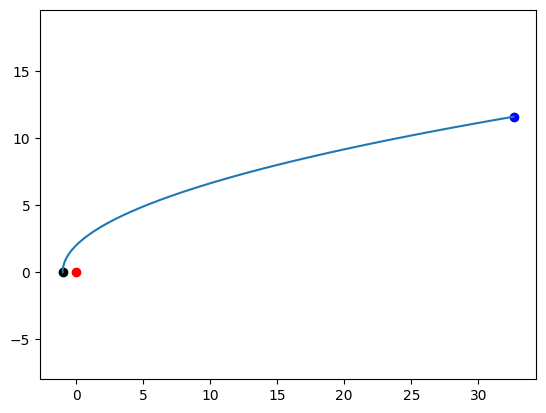

temps pour ordre 7-8 : 0.14304065704345703
Énergie finale pour ordre 7-8 : -2.1614654510671016e-15
temps pour Dormand-Prince : 0.3717160224914551
Énergie finale pour Dormand-Prince : 6.938546959212033e-14


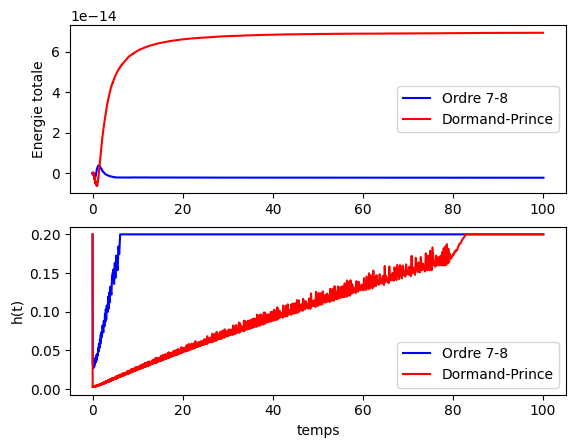

In [14]:
import time

method = "ordre 7-8"
s0 = [-1,0,np.sqrt(2)*np.cos(np.pi/2),np.sqrt(2)*np.sin(np.pi/2)]
a = time.time()
temps1, slist, tab_h1 = RK_orbite(100, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-15), n=4)
b=time.time()
plt.plot(slist[:,0],slist[:,1])
plt.scatter(0,0,color="red")
plt.scatter(-1,0,color="black")
plt.scatter(slist[-1][0],slist[-1][1],color="blue")
plt.axis('equal')
plt.show()

energie1 = []
for X in slist:
  energie1.append(0.5*(X[2]**2 + X[3]**2) - 1/np.sqrt(X[0]**2 + X[1]**2))

print("temps pour", method,":",b-a)
print("Énergie finale pour", method,":",energie1[-1])

method="Dormand-Prince"
s0 = [-1,0,np.sqrt(2)*np.cos(np.pi/2),np.sqrt(2)*np.sin(np.pi/2)]
c = time.time()
temps2, slist, tab_h2 = RK_orbite(100, 500, Adict[method], Bdict[method], Cdict[method], f, s0, 10**(-15), n=4)
d=time.time()


energie2 = []
for X in slist:
  energie2.append(0.5*(X[2]**2 + X[3]**2) - 1/np.sqrt(X[0]**2 + X[1]**2))

print("temps pour", method,":",d-c)
print("Énergie finale pour", method,":",energie2[-1])

plt.subplot(2,1,1)
plt.plot(temps1, energie1, "b", label="Ordre 7-8")
plt.plot(temps2, energie2, "r", label="Dormand-Prince")
plt.ylabel("Energie totale")
plt.legend()
plt.subplot(2,1,2)
plt.plot(temps1, tab_h1, "b", label="Ordre 7-8")
plt.plot(temps2, tab_h2, "r", label="Dormand-Prince")
plt.xlabel("temps")
plt.ylabel("h(t)")
plt.legend()
plt.show()





On obeserve alors la meilleure efficacité de la méthode 7-8. Cette méthode est plus rapide et l'énergie de la solution calculée rest plus proche de 0. \\
On observe tout de même la même tendance pour le pas, qui décroit globalement linéairement au fur et à mesure qui la planète s'éloigne du Soleil. En revanche, le pas de la méthode d'ordre 7-8 peut remonter plus vite car la méthode est plus précise pour un même pas.

## Système Terre-Lune-Soleil

On cherche à simuler un système de type Soleil-Terre-Lune, où le Soleil est figé en $(0,0)$. L'objectif est de comparer la simulation aux mesures astronomiques. $[5]$

Devant les ordres de grandeurs mis en jeu, il n'est pas judicieux de conserver des unités usuelles. Pour cela on introduit :
*   Pour la distance : l'unité astronomique $(ua)$ valant 149 597 870 700 mètres
*   Pour le temps : on prend le jour $(j)$
*   Pour la masse : on exprime toutes les masses en masse solaire $(M_s)$

Notations :
*   $(x_T,y_T)$ la position de la Terre
*   $(x_L,y_L)$ la position de la Lune
*   $m_T$ la position de la Terre
*   $m_L$ la position de la Lune

La constante de gravitation vaut alors $G = 2.95912208286.10^{-4}\, ua^3.j^{-2}.M_s^{-1}$\
La masse du Soleil vaut : $M_s = 1\, M_s$\
La masse de la Terre vaut : $m_T = \frac{1}{332946}\, M_s$\
La masse de la Lune vaut : $m_L = \frac{1}{27068620.9}\, M_s$

### Mise en équations

On fait donc 2 bilans des forces et on obtient l'équation générale suivante :
$$Y' = f(Y)$$ \\

Avec $Y = \begin{pmatrix} x_T(t) \\ y_T(t) \\ x_T'(t) \\ y_T'(t) \\ x_L(t) \\ y_L(t) \\ x_L'(t) \\ y_L'(t)\end{pmatrix}$ et $f\begin{pmatrix} a \\ b \\ c \\ d \\ e \\ f \\ g \\ h \end{pmatrix}=\begin{pmatrix} c \\ d \\ GM_s\frac{-a}{\left(a^2+b^2\right)^{\frac{3}{2}}} + Gm_L\frac{e-a}{\left((e-a)^2+(f-b)^2\right)^{\frac{3}{2}}}\\ GM_s\frac{-b}{\left(a^2+b^2\right)^{\frac{3}{2}}} + Gm_L\frac{f-b}{\left((e-a)^2+(f-b)^2\right)^{\frac{3}{2}}} \\ g \\ h \\ GM_s\frac{-e}{\left(a^2+b^2\right)^{\frac{3}{2}}} - Gm_T\frac{e-a}{\left((e-a)^2+(f-b)^2\right)^{\frac{3}{2}}}\\ GM_s\frac{-f}{\left(a^2+b^2\right)^{\frac{3}{2}}} - Gm_T\frac{f-b}{\left((e-a)^2+(f-b)^2\right)^{\frac{3}{2}}}\end{pmatrix}$.



L'énergie totale du système Terre-Lune vaut alors:
$E=E_{c,T}+E_{c,L}+E_{p,T}+E_{p,T}+E_{p,T<->L} = \frac{1}{2}m_T\left|\left|\vec{v_T}\right|\right|^{2} + \frac{1}{2}m_L\left|\left|\vec{v_L}\right|\right|^{2} - \frac{GM_sm_T}{\left(x_T^2+y_T^2\right)^{\frac{1}{2}}} - \frac{GM_sm_L}{\left(x_L^2+y_L^2\right)^{\frac{1}{2}}} - \frac{Gm_Tm_L}{\left((x_L-x_T)^2+(y_L-y_T)^2\right)^{\frac{1}{2}}}$.



### Simulations

In [15]:
def RK_orbite(T,N,A,B,C,f,y0,tol,n=2):
    h = T/N
    p = len(C)
    temps = [0]
    y = [y0]
    tab_h = [h]
    while temps[-1] <= T:
        if temps[-1]+h>T:
          h=T-temps[-1]
        k = np.zeros((p,n))
        #k = np.array([[0.0,0.0] for i in range(p)])
        for j in range(p):
            k[j] = f(temps[-1] + C[j]*h,y[-1] + (h*(np.transpose(k) @ np.transpose(A[j]))))
        a = h*(np.transpose(k) @ np.transpose(B[0]))
        b = h*(np.transpose(k) @ np.transpose(B[1]))
        c = np.linalg.norm(a-b)
        if c > tol:
            h *= max(tol/c, 0.8)
        else:
            tab_h.append(h)
            y.append(y[-1] + b)
            temps.append(temps[-1]+h)
            h = min(h*tol/c,h*1.2,T/N)
    temps = np.array(temps)
    y = np.array(y)
    tab_h = np.array(tab_h)
    return (temps,y,tab_h)

method = "ordre 7-8"

Dans la simulation, on affiche les deux trajectoires dans le référentiel héliocentrique, mais aussi la trajectoire de la Lune dans le référentiel Géocentrique.

On trace également l'énergie du système total.

In [16]:
def resolSystem(T,s0,tol):
  temps, slist, tab_h = RK_orbite(T, 5000, Adict[method], Bdict[method], Cdict[method], f, s0,tol, n=8)
  plt.plot(slist[:,0],slist[:,1], "b",label="Terre")
  plt.plot(slist[:,4],slist[:,5], "r",label="Lune")
  plt.scatter(0,0,color="orange", label="Soleil")
  plt.scatter(slist[-1][0],slist[-1][1],color="blue")
  plt.scatter(slist[-1][4],slist[-1][5],color="red")
  plt.scatter(s0[0],s0[1],color="black", label="départ")
  plt.axis('equal')
  plt.xlabel("x (ua)")
  plt.ylabel("y (ua)")
  plt.legend()
  plt.title("Orbite Terre-Lune autour du Soleil")
  plt.show()

  plt.plot(slist[:,0]-slist[:,4],slist[:,1]-slist[:,5], "r", label="Lune")
  plt.scatter(0,0,color="blue", label="Terre")
  plt.axis('equal')
  plt.xlabel("x (ua)")
  plt.ylabel("y (ua)")
  plt.title("Orbite Lune autour de la Terre")
  plt.legend()
  plt.show()
  energie = []
  for X in slist:
    energie.append(0.5*mT*(X[2]**2 + X[3]**2) - GM*mT/np.sqrt(X[0]**2 + X[1]**2)+0.5*mL*(X[6]**2 + X[7]**2) - GM*mL/np.sqrt(X[4]**2 + X[5]**2) - GM*mT*mL/np.sqrt((X[0]-X[4])**2 + (X[1]-X[5])**2))
  plt.plot(temps, energie)
  plt.xlabel("t (jour)")
  plt.ylabel("Énergie (J)")
  plt.title("Énergie du système Terre-Lune")
  plt.axis([0,360,-4.498635734*10**(-10),-4.498635733*10**(-10)])
  plt.show()
  return(temps[:-1],slist[:-1])

In [17]:
GM = 2.95912208286*10**(-4)
mT = 1/332946.0
mL = 1/27068620.9

def f(t,s): # Pour l'ensemble du système
    rT = ((s[0])**2 + (s[1])**2)**(1/2)
    rL = ((s[4])**2 + (s[5])**2)**(1/2)
    rTL= ((s[4]-s[0])**2 + (s[5]-s[1])**2)**(1/2) # rayon Terre-Lune
    return np.array([s[2],s[3], - GM * s[0]/(rT)**3 - GM*mL*(s[0]-s[4])/(rTL)**3, -GM * s[1]/(rT)**3 - GM*mL*(s[1]-s[5])/(rTL)**3,s[6],s[7],-GM*s[4]/(rL)**3 + GM*mT*(s[0]-s[4])/(rTL)**3, -GM*s[5]/(rL)**3 + GM*mT*(s[1]-s[5])/(rTL)**3])

On prend pour condition initiales la position
(en projetant sur le plan $z=0$) de la Terre et la Lune au 1er Janvier 2023 à 00:00 selon la base de données **Miriade**. On compare ensuite la position calculé à la position mesurée le 31 décembre 2023 à minuit.

<ipython-input-15-22e4eb45c3ec>:23: RuntimeWarning: invalid value encountered in double_scalars
  h = min(h*tol/c,h*1.2,T/N)


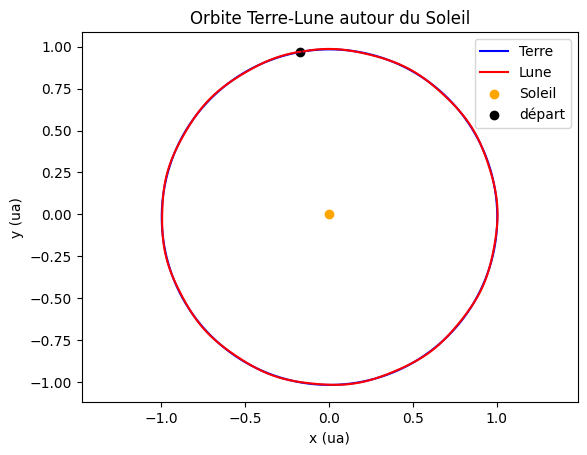

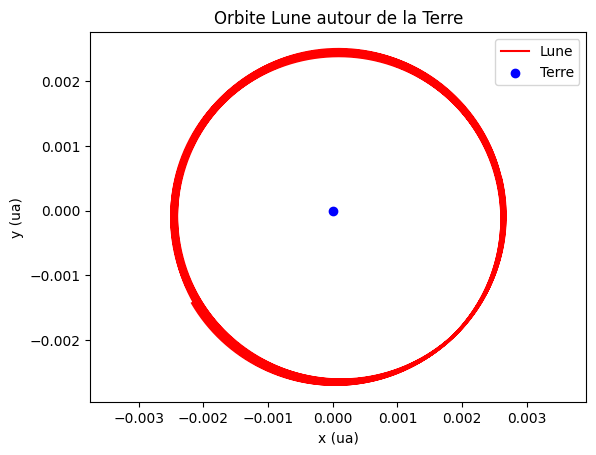

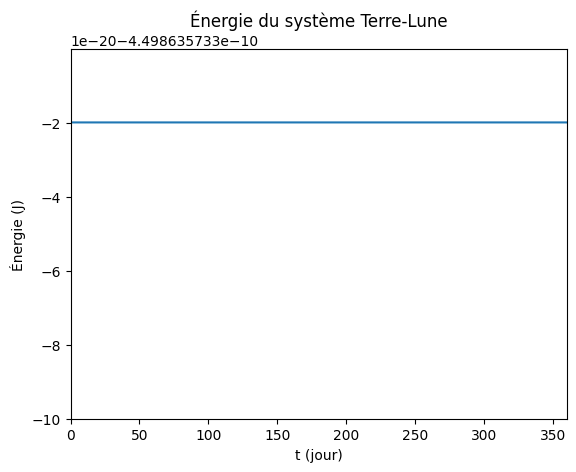

Erreur de positionnement de la Terre : 6.344539696632796e-05 ua.
Erreur de positionnement de la Lune : 0.0021230502761927918 ua.


In [18]:
data_terre = np.loadtxt("Terre.txt",skiprows=5,delimiter=",",usecols=(2,3,5,6))
data_lune = np.loadtxt("Lune.txt",skiprows=5,delimiter=",",usecols=(2,3,5,6))
s0 = list(data_terre[0])+list(data_lune[0])
temps, slist = resolSystem(364,s0,10**(-19))
print("Erreur de positionnement de la Terre :",((slist[-1][0]-data_terre[-1][0])**2 + (slist[-1][1]-data_terre[-1][1])**2)**0.5, "ua.")
print("Erreur de positionnement de la Lune :",((slist[-1][4]-data_lune[-1][0])**2 + (slist[-1][5]-data_lune[-1][1])**2)**0.5, "ua.")

D'une part, la simulation semble satisfasante puisque l'énergie est extrêmement stable.

En revanche, on voit que les erreurs de positionnement ne sont pas négligeables, surtout pour la Lune. On peut y trouver 3 causes:


*   la précision de la simulation, mais après avoir augmenté la tolérance le plus possible en terme de temps de calcul, il semble que cette erreur persiste ;
*   la projection en 2D du problème
*   la négligence de l'influence des autres planètes.

Tentons de remédier à ces deux dernières causes.

### Simulation 3D

On prend désormais l'équation suivante :
$$Y' = f(Y)$$ \\

Avec $Y = \begin{pmatrix} x_T(t) \\ y_T(t) \\ z_T(t) \\ x_T'(t) \\ y_T'(t) \\ z_T'(t) \\ x_L(t) \\ y_L(t) \\ z_L(t) \\ x_L'(t) \\ y_L'(t) \\ z_L'(t)\end{pmatrix}$ et $f\begin{pmatrix} x_T(t) \\ y_T(t) \\ z_T(t) \\ x_T'(t) \\ y_T'(t) \\ z_T'(t) \\ x_L(t) \\ y_L(t) \\ z_L(t) \\ x_L'(t) \\ y_L'(t) \\ z_L'(t) \end{pmatrix}=\begin{pmatrix} x_T'(t) \\ y_T'(t) \\ z_T'(t)\\ GM_s\frac{-x_T(t)}{\left(x_T(t)^2+y_T(t)^2+z_T(t)^2\right)^{\frac{3}{2}}} + Gm_L\frac{x_L(t)-x_T(t)}{\left((x_L(t)-x_T(t))^2+(y_L(t)-y_T(t))^2+(z_L(t)-z_T(t))^2\right)^{\frac{3}{2}}} \\ GM_s\frac{-y_T(t)}{\left(x_T(t)^2+y_T(t)^2+z_T(t)^2\right)^{\frac{3}{2}}} + Gm_L\frac{y_L(t)-y_T(t)}{\left((x_L(t)-x_T(t))^2+(y_L(t)-y_T(t))^2+(z_L(t)-z_T(t))^2\right)^{\frac{3}{2}}} \\ GM_s\frac{-z_T(t)}{\left(x_T(t)^2+y_T(t)^2+z_T(t)^2\right)^{\frac{3}{2}}} + Gm_L\frac{z_L(t)-z_T(t)}{\left((x_L(t)-x_T(t))^2+(y_L(t)-y_T(t))^2+(z_L(t)-z_T(t))^2\right)^{\frac{3}{2}}} \\ x_L'(t) \\ y_L'(t) \\ z_L'(t)\\ GM_s\frac{-x_L(t)}{\left(x_T(t)^2+y_T(t)^2+z_T(t)^2\right)^{\frac{3}{2}}} + Gm_L\frac{x_T(t)-x_L(t)}{\left((x_L(t)-x_T(t))^2+(y_L(t)-y_T(t))^2+(z_L(t)-z_T(t))^2\right)^{\frac{3}{2}}} \\ GM_s\frac{-y_L(t)}{\left(x_T(t)^2+y_T(t)^2+z_T(t)^2\right)^{\frac{3}{2}}} + Gm_L\frac{y_T(t)-y_L(t)}{\left((x_L(t)-x_T(t))^2+(y_L(t)-y_T(t))^2+(z_L(t)-z_T(t))^2\right)^{\frac{3}{2}}} \\ GM_s\frac{-z_L(t)}{\left(x_T(t)^2+y_T(t)^2+z_T(t)^2\right)^{\frac{3}{2}}} + Gm_L\frac{z_T(t)-z_L(t)}{\left((x_L(t)-x_T(t))^2+(y_L(t)-y_T(t))^2+(z_L(t)-z_T(t))^2\right)^{\frac{3}{2}}}\end{pmatrix}$.


L'énergie totale du système Terre-Lune vaut alors:
$E=E_{c,T}+E_{c,L}+E_{p,T}+E_{p,T}+E_{p,T<->L} = \frac{1}{2}m_T\left|\left|\vec{v_T}\right|\right|^{2} + \frac{1}{2}m_L\left|\left|\vec{v_L}\right|\right|^{2} - \frac{GM_sm_T}{\left(x_T^2+y_T^2+z_T^2\right)^{\frac{1}{2}}} - \frac{GM_sm_L}{\left(x_L^2+y_L^2+z_L^2\right)^{\frac{1}{2}}} - \frac{Gm_Tm_L}{\left((x_L-x_T)^2+(y_L-y_T)^2+(z_L-z_T)^2\right)^{\frac{1}{2}}}$.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def resolSystem(T,s0,tol):
  temps, slist, tab_h = RK_orbite(T, 5000, Adict[method], Bdict[method], Cdict[method], f, s0,tol, n=12)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(slist[:,0],slist[:,1],slist[:,2], "b",label="Terre")
  ax.plot(slist[:,6],slist[:,7],slist[:,8], "r",label="Lune")
  ax.scatter(0,0,0,color="orange", label="Soleil")
  ax.scatter(slist[-1][0],slist[-1][1],slist[-1][2],color="blue")
  ax.scatter(slist[-1][6],slist[-1][7],slist[-1][8],color="red")
  ax.axis('equal')
  ax.set_xlabel("x (ua)")
  ax.set_ylabel("y (ua)")
  ax.set_ylabel("z (ua)")
  plt.legend()
  plt.title("Orbite Terre-Lune autour du Soleil")
  plt.show()

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(slist[:,0]-slist[:,6],slist[:,1]-slist[:,7],slist[:,1]-slist[:,7], "r", label="Lune")
  ax.scatter(0,0,0,color="blue", label="Terre")
  ax.axis('equal')
  ax.set_xlabel("x (ua)")
  ax.set_ylabel("y (ua)")
  ax.set_ylabel("z (ua)")
  plt.legend()
  plt.title("Orbite Lune autour de la Terre")
  plt.legend()
  plt.show()

  energie = []
  for X in slist:
    energie.append(0.5*mT*(X[3]**2 + X[4]**2 + X[5]**2) - GM*mT/np.sqrt(X[0]**2 + X[1]**2 + X[2]**2)+0.5*mL*(X[9]**2 + X[10]**2 + X[11]**2) - GM*mL/np.sqrt(X[6]**2 + X[7]**2 + X[8]**2) - GM*mT*mL/np.sqrt((X[0]-X[6])**2 + (X[1]-X[7])**2 + (X[2]-X[8])**2))
  plt.plot(temps, energie)
  plt.xlabel("t (jour)")
  plt.ylabel("Énergie (J)")
  plt.title("Énergie du système Terre-Lune")
  plt.show()
  return(temps[:-1],slist[:-1])

In [20]:
GM = 2.95912208286*10**(-4)
mT = 1/332946.0
mL = 1/27068620.9

def f(t,s): # Pour l'ensemble du système
    rT = ((s[0])**2 + (s[1])**2 + (s[2])**2)**(1/2)
    rL = ((s[6])**2 + (s[7])**2 + (s[8])**2)**(1/2)
    rTL= ((s[6]-s[0])**2 + (s[7]-s[1])**2 + (s[8]-s[2])**2)**(1/2) # rayon Terre-Lune
    return np.array([s[3],s[4],s[5], - GM * s[0]/(rT)**3 - GM*mL*(s[0]-s[6])/(rTL)**3, -GM * s[1]/(rT)**3 - GM*mL*(s[1]-s[7])/(rTL)**3, - GM * s[2]/(rT)**3 - GM*mL*(s[2]-s[8])/(rTL)**3,s[9],s[10],s[11],-GM*s[6]/(rL)**3 + GM*mT*(s[0]-s[6])/(rTL)**3, -GM*s[7]/(rL)**3 + GM*mT*(s[1]-s[7])/(rTL)**3,-GM*s[8]/(rL)**3 + GM*mT*(s[2]-s[8])/(rTL)**3])

<ipython-input-15-22e4eb45c3ec>:23: RuntimeWarning: invalid value encountered in double_scalars
  h = min(h*tol/c,h*1.2,T/N)


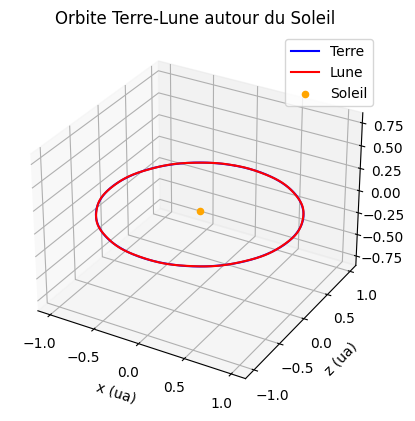

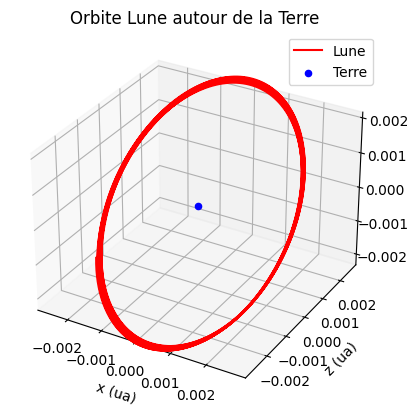

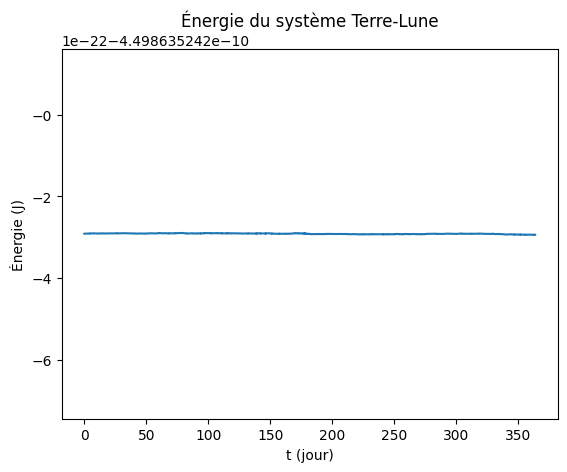

Erreur de positionnement de la Terre : 5.934771216143746e-05 ua.
Erreur de positionnement de la Lune : 5.9322550029405986e-05 ua.


In [21]:
data_terre = np.loadtxt("Terre.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_lune = np.loadtxt("Lune.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
s0 = list(data_terre[0])+list(data_lune[0])
temps, slist = resolSystem(364,s0,10**(-6))
print("Erreur de positionnement de la Terre :",((slist[-1][0]-data_terre[-1][0])**2 + (slist[-1][1]-data_terre[-1][1])**2 + (slist[-1][2]-data_terre[-1][2])**2)**0.5, "ua.")
print("Erreur de positionnement de la Lune :",((slist[-1][6]-data_lune[-1][0])**2 + (slist[-1][7]-data_lune[-1][1])**2 + (slist[-1][8]-data_lune[-1][2])**2)**0.5, "ua.")

<ipython-input-15-22e4eb45c3ec>:23: RuntimeWarning: invalid value encountered in double_scalars
  h = min(h*tol/c,h*1.2,T/N)


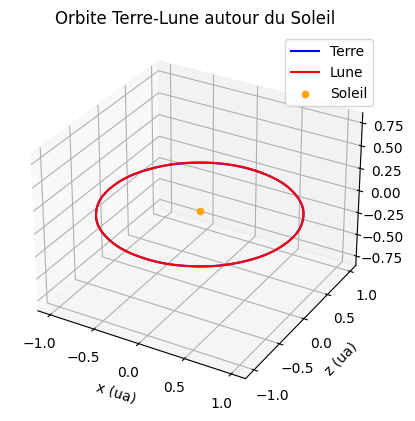

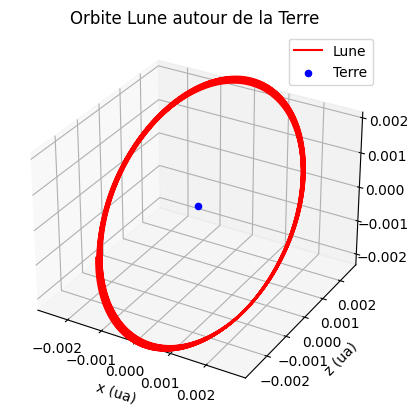

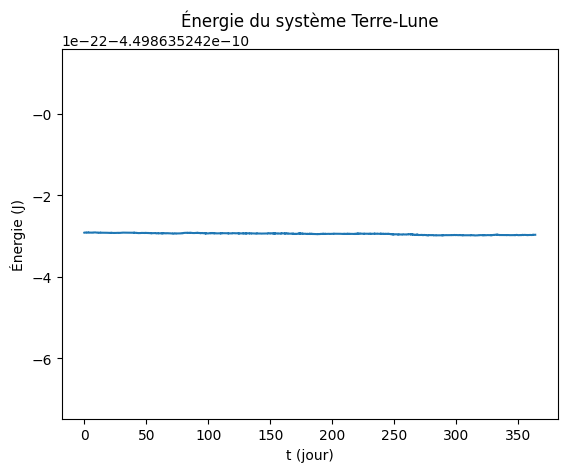

Erreur de positionnement de la Terre : 5.934771176152278e-05 ua.
Erreur de positionnement de la Lune : 5.932254966162075e-05 ua.


In [22]:
s0 = list(data_terre[0])+list(data_lune[0])
temps, slist = resolSystem(364,s0,10**(-18))
print("Erreur de positionnement de la Terre :",((slist[-1][0]-data_terre[-1][0])**2 + (slist[-1][1]-data_terre[-1][1])**2 + (slist[-1][2]-data_terre[-1][2])**2)**0.5, "ua.")
print("Erreur de positionnement de la Lune :",((slist[-1][6]-data_lune[-1][0])**2 + (slist[-1][7]-data_lune[-1][1])**2 + (slist[-1][8]-data_lune[-1][2])**2)**0.5, "ua.")

L'erreur sur la position de la Terre a légèrement diminué, mais surtout la position de la Lune est beaucoup plus réaliste.

Cependant, il reste une part d'erreur qui semble être due à l'absence d'autres planètes du système Solaire.

## Système Solaire

De manière similaire à ce qui a été fait précédement, on va simuler les trajectoires de davantages de planètes, toujours en 3D. Cela nécessite de prendre un vecteur $Y$ de taille $6p$ où $p$ est le nombre d'astres simulés (hors Soleil).

Les équations restent similaires mais il faut prendre en compte les $p!$ forces de gravitations entre chaques astres, tout comme les nouvelles énergies potentielles.

Techniquement pour programmer $f$, on prend les astres un par un, et on calcule chaque interaction avec chaque astre non encore parcouru, et on calcule la force subie par chacun des astres dans cette intéraction.

De même pour l'énergie, on calcule les energie potentielles en regardant les planètes que l'on a pas encore parcourues pour ne pas compter deux fois une même énergie.

In [23]:
GM = 2.95912208286*10**(-4)
mT = 1/332946.0
mL = 1/27068620.9
mMe = 1/6023600
mV = 1/408523.5
mM = 1/3098710
mJ = 1/1047.355
mS = 1/3498.5
mU = 1/22869
mN = 1/19314

mP = [mT,mL,mMe,mV,mM,mJ,mS,mU,mN]
nomP = ["Terre","Lune","Mercure","Venus","Mars","Jupiter","Saturne","Uranus","Neptune"]

def f(t,s): # Pour l'ensemble du système
    res = [0]*(6*len(mP))
    for i in range(len(mP)):
      res[6*i]=s[i*6+3]
      res[6*i+1]=s[i*6+4]
      res[6*i+2]=s[i*6+5]
      distS = (s[i*6]**2+s[i*6+1]**2+s[i*6+2]**2)**0.5
      res[6*i+3] += -GM*s[i*6]/distS**3
      res[6*i+4] += -GM*s[i*6+1]/distS**3
      res[6*i+5] += -GM*s[i*6+2]/distS**3
      for j in range(i+1, len(mP)):
        dist = ((s[j*6]-s[i*6])**2+(s[j*6+1]-s[i*6+1])**2+(s[j*6+2]-s[i*6+2])**2)**0.5
        forceX = GM*(s[j*6]-s[i*6])/(dist**3)
        forceY = GM*(s[j*6+1]-s[i*6+1])/(dist**3)
        forceZ = GM*(s[j*6+2]-s[i*6+2])/(dist**3)
        res[6*i+3] += forceX*mP[j]
        res[6*i+4] += forceY*mP[j]
        res[6*i+5] += forceZ*mP[j]
        res[6*j+3] -= forceX*mP[i]
        res[6*j+4] -= forceY*mP[i]
        res[6*j+5] -= forceZ*mP[i]
    return np.array(res)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def resolSystem(T,s0,tol):
  temps, slist, tab_h = RK_orbite(T, 5000, Adict[method], Bdict[method], Cdict[method], f, s0,tol, n=6*len(mP))
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(mP)):
    ax.plot(slist[:,6*i],slist[:,6*i+1],slist[:,6*i+2],label=nomP[i])
  ax.scatter(0,0,0,color="orange", label="Soleil")
  ax.axis('equal')
  ax.set_xlabel("x (ua)")
  ax.set_ylabel("y (ua)")
  ax.set_ylabel("z (ua)")
  plt.title("Orbite Terre-Lune autour du Soleil")
  plt.show()

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(slist[:,0]-slist[:,6],slist[:,1]-slist[:,7],slist[:,1]-slist[:,7], "r", label="Lune")
  ax.scatter(0,0,0,color="blue", label="Terre")
  ax.axis('equal')
  ax.set_xlabel("x (ua)")
  ax.set_ylabel("y (ua)")
  ax.set_ylabel("z (ua)")
  plt.legend()
  plt.title("Orbite Lune autour de la Terre")
  plt.legend()
  plt.show()

  energie = []
  for X in slist:
    ene = 0
    for i in range(len(mP)):
      ene += 0.5*mP[i]*(X[6*i+3]**2+X[6*i+4]**2+X[6*i+5]**2) - GM*mP[i]/(X[6*i]**2+X[6*i+1]**2+X[6*i+2]**2)**0.5
      for j in range(i+1, len(mP)):
        ene -= GM*mP[i]*mP[j]/((X[6*i]-X[6*j])**2+(X[6*i+1]-X[6*j+1])**2+(X[6*i+2]-X[6*j+2])**2)**0.5
    energie.append(ene)
  plt.plot(temps, energie)
  plt.xlabel("t (jour)")
  plt.ylabel("Énergie (J)")
  plt.title("Énergie du système Solaire")
  plt.show()
  return(temps[:-1],slist[:-1])

On simule sur un temps assez long :

<ipython-input-15-22e4eb45c3ec>:23: RuntimeWarning: invalid value encountered in double_scalars
  h = min(h*tol/c,h*1.2,T/N)


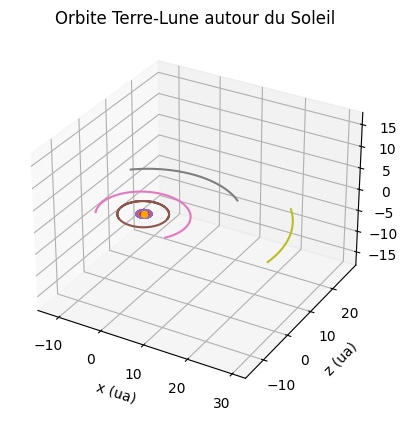

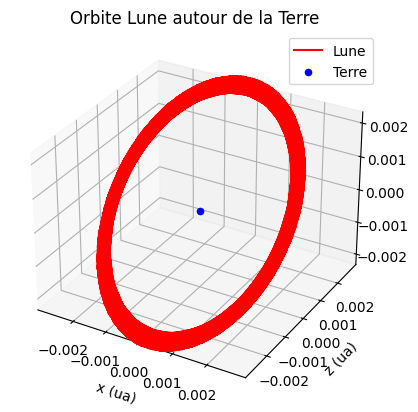

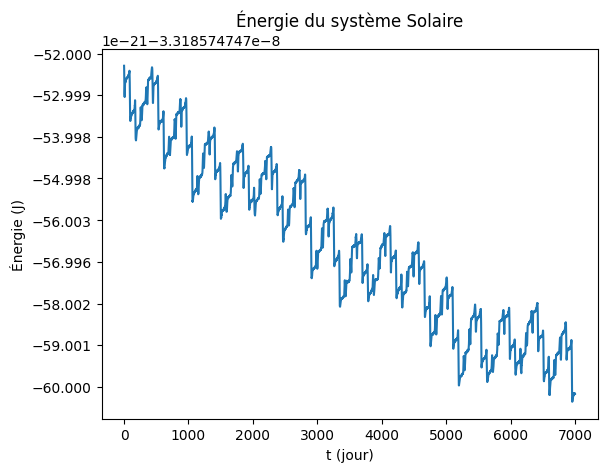

Erreur de positionnement de la Terre : 1.024148509565888 ua.
Erreur de positionnement de la Lune : 1.0224746910933622 ua.


In [25]:
data_T = np.loadtxt("Terre.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_L = np.loadtxt("Lune.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_Me = np.loadtxt("Mercure.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_V = np.loadtxt("Venus.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_M = np.loadtxt("Mars.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_J = np.loadtxt("Jupiter.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_S = np.loadtxt("Saturne.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_U = np.loadtxt("Uranus.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
data_N = np.loadtxt("Neptune.txt",skiprows=5,delimiter=",",usecols=(2,3,4,5,6,7))
s0 = list(data_T[0])+list(data_L[0])+list(data_Me[0])+list(data_V[0])+list(data_M[0])+list(data_J[0])+list(data_S[0])+list(data_U[0])+list(data_N[0])
temps, slist = resolSystem(7000,s0,10**(-12))
print("Erreur de positionnement de la Terre :",((slist[-1][0]-data_T[-1][0])**2 + (slist[-1][1]-data_T[-1][1])**2 + (slist[-1][2]-data_T[-1][2])**2)**0.5, "ua.")
print("Erreur de positionnement de la Lune :",((slist[-1][6]-data_L[-1][0])**2 + (slist[-1][7]-data_L[-1][1])**2 + (slist[-1][8]-data_L[-1][2])**2)**0.5, "ua.")

On simule sur l'année 2023 :

<ipython-input-15-22e4eb45c3ec>:23: RuntimeWarning: invalid value encountered in double_scalars
  h = min(h*tol/c,h*1.2,T/N)


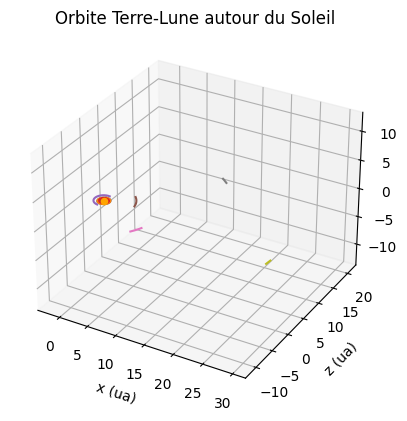

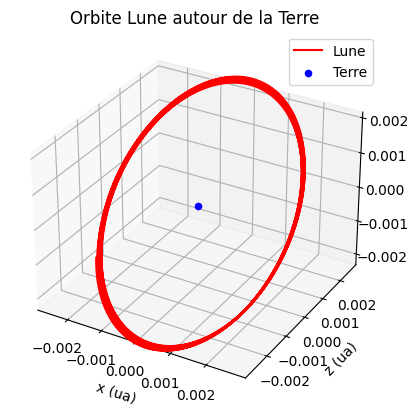

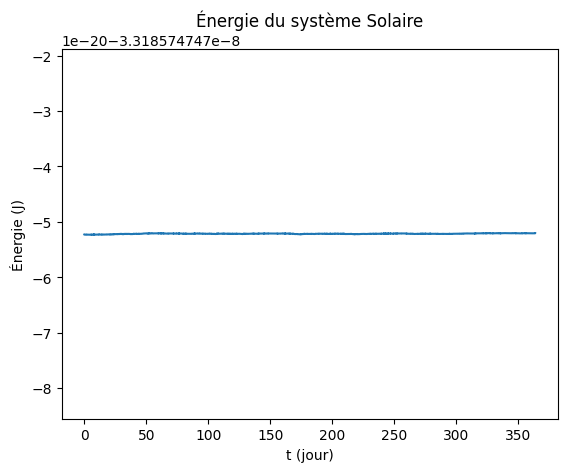

Erreur de positionnement de la Terre : 0.0005541617857687086 ua.
Erreur de positionnement de la Lune : 0.0005541465830169026 ua.


In [26]:
temps, slist = resolSystem(364,s0,10**(-12))
print("Erreur de positionnement de la Terre :",((slist[-1][0]-data_T[-1][0])**2 + (slist[-1][1]-data_T[-1][1])**2 + (slist[-1][2]-data_T[-1][2])**2)**0.5, "ua.")
print("Erreur de positionnement de la Lune :",((slist[-1][6]-data_L[-1][0])**2 + (slist[-1][7]-data_L[-1][1])**2 + (slist[-1][8]-data_L[-1][2])**2)**0.5, "ua.")

Encore une fois, l'énergie est très stable. En revanche, on a perdu en précision sur la position de la Terre et de la Lune, ce qui est étrange. Cela peut eventuellement s'expliquer par la diffusion de la précision requise entre chacun des astres. (On calcule aussi précisément la trajectoire d'Uranus et celle de la Lune).

### Calendrier lunaire

Pour terminer on va chercher à prédire les pleines et nouvelles Lune de 2023 et comparer nos résultats avec un calendrier lunaire. On utilisera ce calendrier $[6]$ qui donne le jour et l'heure des phases de la Lune.

Pour cela on calcule à chaque instant la valeur aboslue du produit vectoriel entre le vecteur Terre-Soleil et Lune-Soleil. Pour une nouvelle ou plein Lune, ce produit vectoriel doit s'annuler car les deux vecteurs sont colinéaires. On retient donc les instants de temps tel que la valeur absolue du produit vectoriel est plus grande au temps précédent et suivant.

On pourrait alors affiner la simulation pour trouver précisément le minimum (qui doit valoir 0), mais on se satisfait ici de la précision obtenue.

Une fois un instant de pleine ou nouvelle Lune identifié (on peut discerner entre les deux cas car ces derniers sont en alternance), on met en forme la date, en l'écrivant sous forme $jj\, mois\; hh:min$.

In [27]:
jours = [31,28,31,30,31,30,31,31,30,31,30,31]
Lmois = ["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]

PL = True
for i in range(len(temps)-2):
  angle1 = abs(slist[i][0]*slist[i][7]-slist[i][1]*slist[i][6])
  angle2 = abs(slist[i+1][0]*slist[i+1][7]-slist[i+1][1]*slist[i+1][6])
  angle3 = abs(slist[i+2][0]*slist[i+2][7]-slist[i+2][1]*slist[i+2][6])
  if angle1 > angle2 and angle2 < angle3:
    d = temps[i+1] + 1
    mois = 0
    while d>=1:
      d-=jours[mois]
      mois+=1
      if mois==12:
        mois=0
    mois-=1
    d+=jours[mois]
    h = d - np.floor(d)
    d=round(np.floor(d))
    h *= 24
    m = h-np.floor(h)
    h = round(np.floor(h))
    m*=60
    m= round(m)
    m = str(m)
    if len(m)==1 :
      m='0'+m
    if PL:
      print("Pleine Lune le ",end='')
      PL = False
    else:
      print("Nouvelle Lune le ",end='')
      PL = True
    print(d, Lmois[mois], "à " + str(h)+"h"+str(m))

Pleine Lune le 6 Janvier à 23h16
Nouvelle Lune le 21 Janvier à 21h27
Pleine Lune le 5 Février à 17h53
Nouvelle Lune le 20 Février à 7h19
Pleine Lune le 7 Mars à 12h29
Nouvelle Lune le 21 Mars à 17h11
Pleine Lune le 6 Avril à 5h20
Nouvelle Lune le 20 Avril à 4h48
Pleine Lune le 5 Mai à 16h57
Nouvelle Lune le 19 Mai à 16h25
Pleine Lune le 4 Juin à 4h34
Nouvelle Lune le 18 Juin à 4h02
Pleine Lune le 3 Juillet à 10h57
Nouvelle Lune le 17 Juillet à 19h09
Pleine Lune le 1 Août à 19h04
Nouvelle Lune le 16 Août à 10h15
Pleine Lune le 31 Août à 1h26
Nouvelle Lune le 15 Septembre à 1h22
Pleine Lune le 29 Septembre à 9h34
Nouvelle Lune le 14 Octobre à 18h13
Pleine Lune le 28 Octobre à 21h11
Nouvelle Lune le 13 Novembre à 9h20
Pleine Lune le 27 Novembre à 8h48
Nouvelle Lune le 13 Décembre à 0h26
Pleine Lune le 26 Décembre à 23h54


On remarque que les prédictions sont très bonnes avec une erreur qui dépasse rarement les deux heures.

# Sources bibliographiques


$[1]$ [Sur les méthodes de Runge-Kutta et les tableaux de
Butcher, 2020](https://clarolineconnect.univ-lyon1.fr/clarolinepdfplayerbundle/pdf/3578228)\
$[2]$ [https://docs.python.org/fr/3/tutorial/floatingpoint.html
](https://docs.python.org/fr/3/tutorial/floatingpoint.html
)\
$[3]$ E. Hairer, S. P. Nørsett, G. Wanner, *Solving Ordinary Differential Equations I*, Chap II.4\
$[4]$ [https://femto-physique.fr/mecanique/forces-centrales.php](https://femto-physique.fr/mecanique/forces-centrales.php) \
$[5]$ [https://vo.imcce.fr/webservices/miriade/?forms](https://vo.imcce.fr/webservices/miriade/?forms)\
$[6]$ [https://kalendrier.ouest-france.fr/calendrier-lunaire-2023.html](https://kalendrier.ouest-france.fr/calendrier-lunaire-2023.html)
